<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Price Prediction

# Part 1: Data Cleaning & Exploratory Data Analysis

## Problem Statement

As part of Data Science team in Ames Property Consultancy Company, I aim to use Linear Regression model to best predict residential house sales price at Ames based on fixed features and to identify the important house predictors on residential house sales price. The target stakeholders of this new project are House Buyers, House Owner, Devleopers and Housing agent, different business suggestions will be made for stakeholders on the model predictors.

In this project, I have attempted these regression models-Linear Regression, LASSO, Ridge and Elastic Net, enhanced by feature engineering, feature selection, regularization and GridSearch. The success of the model will be measured using R-square on unseen data and the RMSE score given by Kaggle.

### Contents:
- [1. Importing Libraries](#1.-Importing-Libraries)
- [2. Data Import](#2.-Data-Import)
- [3. Data Inspection](#3.-Data-Inspection)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. EDA & Data Visualization](#5.-EDA-&-Data-Visualization)
- [Summary](#Summary)

Train & Test Datasets will be inspected and handled concurrently.

---

# 1. Import Libraries

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import csv
from datetime import date
from sklearn import preprocessing
from scipy.stats import chi2_contingency

#!pip install dython
from dython import nominal

%matplotlib inline

# 2. Data Import

In [2]:
#import train & validation dataset, and test dataset

path = "../datasets/"
df_train = pd.read_csv(path + "train.csv")
df_test  =pd.read_csv(path + "test.csv")

# 3. Data Inspection

## 3.1 Group Columns by Data Dictionary

I have grouped the data columns into 7 groups according the Data Dictionary provided-http://jse.amstat.org/v19n3/decock/DataDocumentation.txt. 

- continuous_cols: continous data columns(total 19 columns)
- discrete_cols : discrete data columns(total 15 columns)
- nominal_cols: nominal data columns (total 24 columns with 4 columns accept None Value)
- ordinal_cols: ordinal data columns (total 23 columns with 11 columns accept None Value)
- target_variable: model prediction target
- garage_cols: all columns for garage data (total 7 columns)
- basement_cols: all columns for basement data (total 11 columns)

In total 81 columns data We shall have.

In the following Data Cleaning & Feature Engineering process, I will elaboration in more details acccording to these groups of data.

Also I will create 3 new lists for created new features, removed features and strong correlated features.

In [3]:
continuous_cols= ['Lot Frontage','Lot Area', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF',
                  '2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
                 '3Ssn Porch','Screen Porch','Pool Area','Misc Val']

In [4]:
discrete_cols = ['Id','Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr',
                'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold','Yr Sold']

In [5]:
# There's None value for 4 columns based on Data Dictionary: Alley, Mas Vnr Type, Garage Type,Misc Feature
nominal_cols = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1',
               'Condition 2', 'Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
               'Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type']

In [6]:
# There's None value for 11 columns based on Data Dictionary: Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, 
# BsmtFinType 2, FireplaceQu, Garage Finish, Garage Qual
# Garage Cond, Pool QC, Fence.

ordinal_cols = ['Lot Shape', 'Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual',
               'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
               'Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [7]:
target_variable = ['SalePrice']

In [8]:
# 7 columns for garage data
garage_cols= ['Garage Type', 'Garage Yr Blt', 'Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']

In [9]:
# 11 columns for basement data
basement_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2',
                'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath']

In [10]:
print (len(continuous_cols) + len(discrete_cols) + len(nominal_cols) + len(ordinal_cols) +1)

81


In [11]:
# These 3 groups of list data for created new features, removed features and strong correlated features.
del_cols =[]
new_cols =[]
strongly_correlated = []

## 3.2 Inspection on train dataset

In [12]:
df_train.shape
# there are 2051 rows and 81 columns in train_validate dataset

(2051, 81)

In [13]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [15]:
# inspection on numeric features
df_train.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


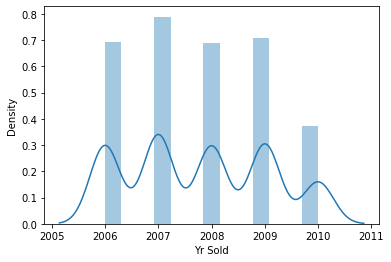

In [16]:
sns.distplot(df_train['Yr Sold'])
plt.show()

## Comments:
1. There's total 82 columns in Data Dictionary, but in our train dataset there are 81 columns. I noticed that column "Sales Condition" is missing.
Thus I will assume that all these properties were sold as Normal Sale.
2. Training data contains 5 years sold house records from 2006 to 2010.

### 3.2.1 Inspection Continous Data on train dataset

In [17]:
df_train[continuous_cols].head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,NaN,13517,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,0,0,0,0
1,43.0,11492,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,0,0,0,0
2,68.0,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,0,0,0,0
3,73.0,9802,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,0,0,0,0
4,82.0,14235,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,0,0,0,0


In [18]:
df_train[continuous_cols].shape

(2051, 19)

In [19]:
df_train[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
Mas Vnr Area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
BsmtFin SF 1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
BsmtFin SF 2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0
Bsmt Unf SF,2050.0,567.728293,444.954786,0.0,220.0,474.5,811.00,2336.0
Total Bsmt SF,2050.0,1057.987805,449.410704,0.0,793.0,994.5,1318.75,6110.0
1st Flr SF,2051.0,1164.488055,396.446923,334.0,879.5,1093.0,1405.00,5095.0
2nd Flr SF,2051.0,329.329108,425.671046,0.0,0.0,0.0,692.50,1862.0
Low Qual Fin SF,2051.0,5.512921,51.068870,0.0,0.0,0.0,0.00,1064.0


In [20]:
df_train[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     1721 non-null   float64
 1   Lot Area         2051 non-null   int64  
 2   Mas Vnr Area     2029 non-null   float64
 3   BsmtFin SF 1     2050 non-null   float64
 4   BsmtFin SF 2     2050 non-null   float64
 5   Bsmt Unf SF      2050 non-null   float64
 6   Total Bsmt SF    2050 non-null   float64
 7   1st Flr SF       2051 non-null   int64  
 8   2nd Flr SF       2051 non-null   int64  
 9   Low Qual Fin SF  2051 non-null   int64  
 10  Gr Liv Area      2051 non-null   int64  
 11  Garage Area      2050 non-null   float64
 12  Wood Deck SF     2051 non-null   int64  
 13  Open Porch SF    2051 non-null   int64  
 14  Enclosed Porch   2051 non-null   int64  
 15  3Ssn Porch       2051 non-null   int64  
 16  Screen Porch     2051 non-null   int64  
 17  Pool Area     

## Comments:
Among the 19 continuous features, their data types are either float 64 or int64, and there are 2 features with null values from the dataframe info.

 I will do further inspections & handle them in Data Cleaning process.

### 3.2.2 Inspection Discrete Data on train dataset

In [21]:
df_train[discrete_cols].head()

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,109,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010
1,544,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009
2,153,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010
3,318,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010
4,255,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010


In [22]:
df_train[discrete_cols].shape

(2051, 15)

In [23]:
df_train[discrete_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.0,2010.0
Bsmt Full Bath,2049.0,0.427526,0.522673,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2049.0,0.063446,0.251705,0.0,0.0,0.0,0.0,2.0
Full Bath,2051.0,1.577279,0.549279,0.0,1.0,2.0,2.0,4.0
Half Bath,2051.0,0.371039,0.501043,0.0,0.0,0.0,1.0,2.0
Bedroom AbvGr,2051.0,2.843491,0.826618,0.0,2.0,3.0,3.0,8.0
Kitchen AbvGr,2051.0,1.042906,0.209790,0.0,1.0,1.0,1.0,3.0
TotRms AbvGrd,2051.0,6.435885,1.560225,2.0,5.0,6.0,7.0,15.0


In [24]:
df_train[discrete_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2051 non-null   int64  
 1   Year Built      2051 non-null   int64  
 2   Year Remod/Add  2051 non-null   int64  
 3   Bsmt Full Bath  2049 non-null   float64
 4   Bsmt Half Bath  2049 non-null   float64
 5   Full Bath       2051 non-null   int64  
 6   Half Bath       2051 non-null   int64  
 7   Bedroom AbvGr   2051 non-null   int64  
 8   Kitchen AbvGr   2051 non-null   int64  
 9   TotRms AbvGrd   2051 non-null   int64  
 10  Fireplaces      2051 non-null   int64  
 11  Garage Yr Blt   1937 non-null   float64
 12  Garage Cars     2050 non-null   float64
 13  Mo Sold         2051 non-null   int64  
 14  Yr Sold         2051 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 240.5 KB


## Comments:
Among the 15 discrete features, their data types are either float 64 or int64, and there are 4 features with null values from the dataframe info.

 I will do further inspections & handle them in Data Cleaning process.

### 3.2.3 Inspection Nominal Data on train dataset

In [25]:
df_train[nominal_cols].head()

,PID,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,...,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type
0,533352170,60,RL,Pave,NaN,Lvl,CulDSac,Sawyer,RRAe,Norm,...,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD
1,531379050,60,RL,Pave,NaN,Lvl,CulDSac,SawyerW,Norm,Norm,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NaN,WD
2,535304180,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,...,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,NaN,WD
3,916386060,60,RL,Pave,NaN,Lvl,Inside,Timber,Norm,Norm,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD
4,906425045,50,RL,Pave,NaN,Lvl,Inside,SawyerW,Norm,Norm,...,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,NaN,WD


In [26]:
df_train[nominal_cols].shape

(2051, 23)

In [27]:
df_train[nominal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           2051 non-null   int64 
 1   MS SubClass   2051 non-null   int64 
 2   MS Zoning     2051 non-null   object
 3   Street        2051 non-null   object
 4   Alley         140 non-null    object
 5   Land Contour  2051 non-null   object
 6   Lot Config    2051 non-null   object
 7   Neighborhood  2051 non-null   object
 8   Condition 1   2051 non-null   object
 9   Condition 2   2051 non-null   object
 10  Bldg Type     2051 non-null   object
 11  House Style   2051 non-null   object
 12  Roof Style    2051 non-null   object
 13  Roof Matl     2051 non-null   object
 14  Exterior 1st  2051 non-null   object
 15  Exterior 2nd  2051 non-null   object
 16  Mas Vnr Type  2029 non-null   object
 17  Foundation    2051 non-null   object
 18  Heating       2051 non-null   object
 19  Centra

## Comments:
Among the 23 nominal features, their data types are object type and there are 4 features with null values from the dataframe info, which "Alley" & "Misc Feature" have the most missing values. 

 I will do further inspections & handle them in Data Cleaning process.

### 3.2.4 Inspection Ordinal Data on train dataset

In [28]:
df_train[ordinal_cols].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,No,...,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN
1,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN
2,Reg,AllPub,Gtl,5,7,TA,Gd,TA,TA,No,...,SBrkr,Gd,Typ,NaN,Unf,TA,TA,Y,NaN,NaN
3,Reg,AllPub,Gtl,5,5,TA,TA,Gd,TA,No,...,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y,NaN,NaN
4,IR1,AllPub,Gtl,6,8,TA,TA,Fa,Gd,No,...,SBrkr,TA,Typ,NaN,Unf,TA,TA,N,NaN,NaN


In [29]:
df_train[ordinal_cols].shape

(2051, 23)

In [30]:
df_train[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Utilities       2051 non-null   object
 2   Land Slope      2051 non-null   object
 3   Overall Qual    2051 non-null   int64 
 4   Overall Cond    2051 non-null   int64 
 5   Exter Qual      2051 non-null   object
 6   Exter Cond      2051 non-null   object
 7   Bsmt Qual       1996 non-null   object
 8   Bsmt Cond       1996 non-null   object
 9   Bsmt Exposure   1993 non-null   object
 10  BsmtFin Type 1  1996 non-null   object
 11  BsmtFin Type 2  1995 non-null   object
 12  Heating QC      2051 non-null   object
 13  Electrical      2051 non-null   object
 14  Kitchen Qual    2051 non-null   object
 15  Functional      2051 non-null   object
 16  Fireplace Qu    1051 non-null   object
 17  Garage Finish   1937 non-null   object
 18  Garage Q

## Comments:
Among the 23 nominal features, their data types are object type and there are 12 features with null values from the dataframe info, which Basement & Garage characterics have the most missing values, i.e. "Bsmt Qual", "Bsmt Cond", etc.

I will do further inspections & handle them in Data Cleaning process.

### 3.2.5 Inspection Garage Data on train dataset

In [31]:
df_train[garage_cols].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA


In [32]:
df_train[garage_cols].shape

(2051, 7)

In [33]:
df_train[garage_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    1938 non-null   object 
 1   Garage Yr Blt  1937 non-null   float64
 2   Garage Finish  1937 non-null   object 
 3   Garage Cars    2050 non-null   float64
 4   Garage Area    2050 non-null   float64
 5   Garage Qual    1937 non-null   object 
 6   Garage Cond    1937 non-null   object 
dtypes: float64(3), object(4)
memory usage: 112.3+ KB


## Comments:
Among the 7 Garage features, their data types are either object type or float64. We can see that all features have missing values and I will do further inspections & handle them in Data Cleaning process.

### 3.2.6 Inspection Basement Data on train dataset

In [34]:
df_train[basement_cols].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,0.0,0.0
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,1.0,0.0
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,1.0,0.0
3,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,0.0,0.0
4,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,0.0,0.0


In [35]:
df_train[basement_cols].shape

(2051, 11)

In [36]:
df_train[basement_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       1996 non-null   object 
 1   Bsmt Cond       1996 non-null   object 
 2   Bsmt Exposure   1993 non-null   object 
 3   BsmtFin Type 1  1996 non-null   object 
 4   BsmtFin SF 1    2050 non-null   float64
 5   BsmtFin Type 2  1995 non-null   object 
 6   BsmtFin SF 2    2050 non-null   float64
 7   Bsmt Unf SF     2050 non-null   float64
 8   Total Bsmt SF   2050 non-null   float64
 9   Bsmt Full Bath  2049 non-null   float64
 10  Bsmt Half Bath  2049 non-null   float64
dtypes: float64(6), object(5)
memory usage: 176.4+ KB


## Comments:
Among the 11 Garage features, their data types are either object type or float64. We can see that all features have missing values and I will do further inspections & handle them in Data Cleaning process.

### 3.2.7 Inspection Target Variable on train dataset

In [37]:
df_train[target_variable].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


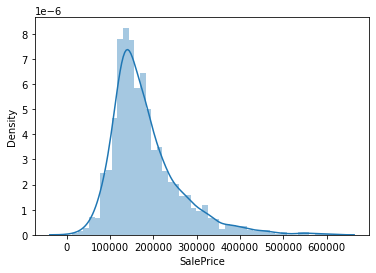

In [38]:
sns.distplot(df_train['SalePrice'])
plt.show()

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


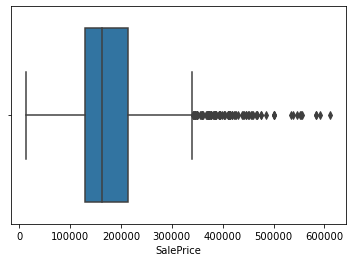

In [39]:
sns.boxplot(df_train['SalePrice'])
plt.show()

## Comments:

In train dataset, the sold house price is between 12789.0 and 611657.0 with the mean of 181469.
The distribution shows that SalePrice does not follow normal distribution, it has positive skewness, there are very samll number of houses have very high SalePrice. Also the SalePrice is not linear, which means we cannot find a straight line that would fit the SalePrice data, so we have to transform SalePrice so that it will have normal distribution. I will do that during the Data Processing and Engineering part.

## Comments for overall Training Data: 
- One-hot Encoding is required for all Nominal & Ordinal columns
- Continous & Discrete data are relatively more complete than Nominal & Ordinal data, especially many incomplete data for Basement & Garage data.
- PID will be removed because its just parcel identification number. It does not contribute to the prediction of housing price
- Many columns with null value, I will handle them in Missing Value part as some columns accept None Value means that specific features is not applied to the house been sold.

## 3.3 Inspection on test dataset
(This test data will be used for final Model prediction and the prediction result will submit to Kaggle to test for model tunning and success reference.)

In [40]:
df_test.shape
# there are 878 rows and 80 columns in test dataset

(878, 80)

In [41]:
df_train.shape

(2051, 81)

In [42]:
# check data ratio of test data among all data (train + test)
print (878/(2015+878) * 100)
# Train, test split by around 70% vs 30 %

30.349118562046318


In [43]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [45]:
# inspection on numeric features
df_test.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


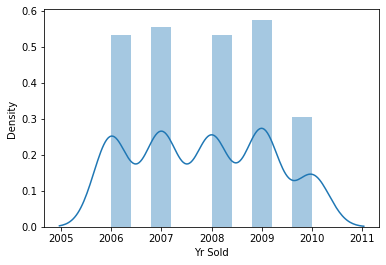

In [46]:
sns.distplot(df_test['Yr Sold'])
plt.show()

## Comments:
1. There are total 80 columns in Test dataset, as no model target prediction column "Sales Price"
2. From the data volume of Train & Test dataset, We can understand that Train, Test split by around 70% vs 30 % on total data volume
3. Same as Train data, I will assume all these properties will be sold as Normal Sale.
4. Both Train and Test data are sold in the same years range (5 years from 2006 to 2010).

### 3.3.1 Inspection Continous Data on test dataset

In [47]:
df_test[continuous_cols].head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,69.0,9142,0.0,0,0,1020,1020,908,1020,0,1928,440,0,60,112,0,0,0,0
1,NaN,9662,0.0,0,0,1967,1967,1967,0,0,1967,580,170,0,0,0,0,0,0
2,58.0,17104,0.0,554,0,100,654,664,832,0,1496,426,100,24,0,0,0,0,0
3,60.0,8520,0.0,0,0,968,968,968,0,0,968,480,0,0,184,0,0,0,0
4,NaN,9500,247.0,609,0,785,1394,1394,0,0,1394,514,0,76,0,0,185,0,0


In [48]:
df_test[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,718.0,69.545961,23.533945,21.0,59.00,68.0,80.00,182.0
Lot Area,878.0,10307.033030,10002.674602,1477.0,7297.25,9446.0,11589.00,215245.0
Mas Vnr Area,877.0,106.236032,187.158908,0.0,0.00,0.0,172.00,1378.0
BsmtFin SF 1,878.0,441.328018,438.457329,0.0,0.00,373.0,734.75,2288.0
BsmtFin SF 2,878.0,53.896355,178.632355,0.0,0.00,0.0,0.00,1526.0
Bsmt Unf SF,878.0,539.133257,426.172161,0.0,216.00,452.0,780.00,2046.0
Total Bsmt SF,878.0,1034.357631,413.446291,0.0,789.00,975.0,1247.00,2630.0
1st Flr SF,878.0,1145.787016,375.264111,407.0,864.00,1063.0,1358.00,2674.0
2nd Flr SF,878.0,348.398633,432.985566,0.0,0.00,0.0,720.00,2065.0
Low Qual Fin SF,878.0,2.728929,32.572548,0.0,0.00,0.0,0.00,481.0


In [49]:
df_test[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     718 non-null    float64
 1   Lot Area         878 non-null    int64  
 2   Mas Vnr Area     877 non-null    float64
 3   BsmtFin SF 1     878 non-null    int64  
 4   BsmtFin SF 2     878 non-null    int64  
 5   Bsmt Unf SF      878 non-null    int64  
 6   Total Bsmt SF    878 non-null    int64  
 7   1st Flr SF       878 non-null    int64  
 8   2nd Flr SF       878 non-null    int64  
 9   Low Qual Fin SF  878 non-null    int64  
 10  Gr Liv Area      878 non-null    int64  
 11  Garage Area      878 non-null    int64  
 12  Wood Deck SF     878 non-null    int64  
 13  Open Porch SF    878 non-null    int64  
 14  Enclosed Porch   878 non-null    int64  
 15  3Ssn Porch       878 non-null    int64  
 16  Screen Porch     878 non-null    int64  
 17  Pool Area       

## Comments:
Among the 19 continuous features, their data types are either float 64 or int64, and there are 2 features -"Lot Frontage" &  "Mas Vnr Area" with null values from the dataframe info. I will do further inspections & handle them in Data Cleaning process.

### 3.3.2 Inspection Discrete Data on test dataset

In [50]:
df_test[discrete_cols].head()

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,2658,1910,1950,0,0,2,0,4,2,9,0,1910.0,1,4,2006
1,2718,1977,1977,0,0,2,0,6,2,10,0,1977.0,2,8,2006
2,2414,2006,2006,1,0,2,1,3,1,7,1,2006.0,2,9,2006
3,1989,1923,2006,0,0,1,0,2,1,5,0,1935.0,2,7,2007
4,625,1963,1963,1,0,1,1,3,1,6,2,1963.0,2,7,2009


In [51]:
df_test[discrete_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1444.749431,850.838263,2.0,692.25,1433.0,2197.50,2928.0
Year Built,878.0,1970.492027,30.395895,1880.0,1954.00,1972.0,1999.75,2010.0
Year Remod/Add,878.0,1984.417995,20.450725,1950.0,1967.00,1992.0,2003.00,2010.0
Bsmt Full Bath,878.0,0.439636,0.529948,0.0,0.00,0.0,1.00,2.0
Bsmt Half Bath,878.0,0.055809,0.229683,0.0,0.00,0.0,0.00,1.0
Full Bath,878.0,1.539863,0.559060,0.0,1.00,2.0,2.00,4.0
Half Bath,878.0,0.398633,0.505927,0.0,0.00,0.0,1.00,2.0
Bedroom AbvGr,878.0,2.879271,0.830712,0.0,2.00,3.0,3.00,6.0
Kitchen AbvGr,878.0,1.047836,0.223966,0.0,1.00,1.0,1.00,3.0
TotRms AbvGrd,878.0,6.454442,1.596632,3.0,5.00,6.0,7.00,12.0


In [52]:
df_test[discrete_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              878 non-null    int64  
 1   Year Built      878 non-null    int64  
 2   Year Remod/Add  878 non-null    int64  
 3   Bsmt Full Bath  878 non-null    int64  
 4   Bsmt Half Bath  878 non-null    int64  
 5   Full Bath       878 non-null    int64  
 6   Half Bath       878 non-null    int64  
 7   Bedroom AbvGr   878 non-null    int64  
 8   Kitchen AbvGr   878 non-null    int64  
 9   TotRms AbvGrd   878 non-null    int64  
 10  Fireplaces      878 non-null    int64  
 11  Garage Yr Blt   833 non-null    float64
 12  Garage Cars     878 non-null    int64  
 13  Mo Sold         878 non-null    int64  
 14  Yr Sold         878 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 103.0 KB


## Comments:
Among the 15 discrete features, their data types are either float 64 or int64, and there is only 1 feature-"Garage Yr Blt" with null values from the dataframe info.  I will do further inspections & handle it in Data Cleaning process.

### 3.3.3 Inspection Nominal Data on test dataset

In [53]:
df_test[nominal_cols].head()

,PID,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,...,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type
0,902301120,190,RM,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,...,CompShg,AsbShng,AsbShng,None,Stone,GasA,N,Detchd,NaN,WD
1,905108090,90,RL,Pave,NaN,Lvl,Inside,Sawyer,Norm,Norm,...,CompShg,Plywood,Plywood,None,CBlock,GasA,Y,Attchd,NaN,WD
2,528218130,60,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,NaN,New
3,902207150,30,RM,Pave,NaN,Lvl,Inside,OldTown,Norm,Norm,...,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,Y,Detchd,NaN,WD
4,535105100,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,...,CompShg,Plywood,Plywood,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD


In [54]:
df_test[nominal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           878 non-null    int64 
 1   MS SubClass   878 non-null    int64 
 2   MS Zoning     878 non-null    object
 3   Street        878 non-null    object
 4   Alley         58 non-null     object
 5   Land Contour  878 non-null    object
 6   Lot Config    878 non-null    object
 7   Neighborhood  878 non-null    object
 8   Condition 1   878 non-null    object
 9   Condition 2   878 non-null    object
 10  Bldg Type     878 non-null    object
 11  House Style   878 non-null    object
 12  Roof Style    878 non-null    object
 13  Roof Matl     878 non-null    object
 14  Exterior 1st  878 non-null    object
 15  Exterior 2nd  878 non-null    object
 16  Mas Vnr Type  877 non-null    object
 17  Foundation    878 non-null    object
 18  Heating       878 non-null    object
 19  Central 

## Comments:
Among the 23 nominal features, their data types are object type except for PID and there are 2 features-"Alley" & "Misc Feature" with null values from the dataframe info. I will do further inspections & handle them in Data Cleaning process.

### 3.3.4 Inspection Ordinal Data on test dataset

In [55]:
df_test[ordinal_cols].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,Reg,AllPub,Gtl,6,8,TA,Fa,Fa,TA,No,...,FuseP,Fa,Typ,NaN,Unf,Po,Po,Y,NaN,NaN
1,IR1,AllPub,Gtl,5,4,TA,TA,Gd,TA,No,...,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y,NaN,NaN
2,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,Gd,Av,...,SBrkr,Gd,Typ,Gd,RFn,TA,TA,Y,NaN,NaN
3,Reg,AllPub,Gtl,5,6,Gd,TA,TA,TA,No,...,SBrkr,TA,Typ,NaN,Unf,Fa,TA,N,NaN,NaN
4,IR1,AllPub,Gtl,6,5,TA,TA,Gd,TA,No,...,SBrkr,TA,Typ,Gd,RFn,TA,TA,Y,NaN,NaN


In [56]:
df_test[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       878 non-null    object
 1   Utilities       878 non-null    object
 2   Land Slope      878 non-null    object
 3   Overall Qual    878 non-null    int64 
 4   Overall Cond    878 non-null    int64 
 5   Exter Qual      878 non-null    object
 6   Exter Cond      878 non-null    object
 7   Bsmt Qual       853 non-null    object
 8   Bsmt Cond       853 non-null    object
 9   Bsmt Exposure   853 non-null    object
 10  BsmtFin Type 1  853 non-null    object
 11  BsmtFin Type 2  853 non-null    object
 12  Heating QC      878 non-null    object
 13  Electrical      877 non-null    object
 14  Kitchen Qual    878 non-null    object
 15  Functional      878 non-null    object
 16  Fireplace Qu    456 non-null    object
 17  Garage Finish   833 non-null    object
 18  Garage Qua

## Comments:
Among the 23 nominal features, their data types are object type and there are 12 features with null values from the dataframe info, same as Train dataset, Basement & Garage characterics have some missing values.
The "Pool QC" feature has most missing values with only 4 non-null vales.

I will do further inspections & handle them in Data Cleaning process.

### 3.3.5 Inspection Garage Data on test dataset

In [57]:
df_test[garage_cols].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Detchd,1910.0,Unf,1,440,Po,Po
1,Attchd,1977.0,Fin,2,580,TA,TA
2,Attchd,2006.0,RFn,2,426,TA,TA
3,Detchd,1935.0,Unf,2,480,Fa,TA
4,Attchd,1963.0,RFn,2,514,TA,TA


In [58]:
df_test[garage_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    834 non-null    object 
 1   Garage Yr Blt  833 non-null    float64
 2   Garage Finish  833 non-null    object 
 3   Garage Cars    878 non-null    int64  
 4   Garage Area    878 non-null    int64  
 5   Garage Qual    833 non-null    object 
 6   Garage Cond    833 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ KB


## Comments:
Among the 7 Garage features, their data types are either object type or float64. 
We can see that less Garage features have missing values compared to Train Dataset.

I will do further inspections & handle them in Data Cleaning process.

### 3.3.6 Inspection Basement Data on test dataset

In [59]:
df_test[basement_cols].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,Fa,TA,No,Unf,0,Unf,0,1020,1020,0,0
1,Gd,TA,No,Unf,0,Unf,0,1967,1967,0,0
2,Gd,Gd,Av,GLQ,554,Unf,0,100,654,1,0
3,TA,TA,No,Unf,0,Unf,0,968,968,0,0
4,Gd,TA,No,BLQ,609,Unf,0,785,1394,1,0


In [60]:
df_test[basement_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bsmt Qual       853 non-null    object
 1   Bsmt Cond       853 non-null    object
 2   Bsmt Exposure   853 non-null    object
 3   BsmtFin Type 1  853 non-null    object
 4   BsmtFin SF 1    878 non-null    int64 
 5   BsmtFin Type 2  853 non-null    object
 6   BsmtFin SF 2    878 non-null    int64 
 7   Bsmt Unf SF     878 non-null    int64 
 8   Total Bsmt SF   878 non-null    int64 
 9   Bsmt Full Bath  878 non-null    int64 
 10  Bsmt Half Bath  878 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 75.6+ KB


## Comments:
Among the 11 Garage features, their data types are either object type or float64. We can see that less Garage features have missing values compared to Train Dataset.

I will do further inspections & handle them in Data Cleaning process.

## Comments for overall Test Data:

Same as Train data, I plan to do same for Test dataset:
- One-hot Encoding is required for all Nominal & Ordinal columns
- Continous & Discrete data are relatively more complete than Nominal & Ordinal data, especially many incomplete data for Basement & Garage data.
- PID will be removed because its just parcel identification number. It does not contribute to the prediction of housing price
- Many columns with null value, I will handle them in Missing Value part as some columns accept None Value means that specific features is not applied to the house been sold.

---

# 4. Data Cleaning
---

### 4.1 Drop "PID" column

In [61]:
# Drop "PID" column for both Train & Test Datasets
df_train.drop(columns = 'PID', inplace = True)
df_test.drop(columns = 'PID', inplace = True)
nominal_cols.remove('PID')


# Store all columns been dropped into del_cols list
del_cols.append('PID')
del_cols

['PID']

## 4.2 Check missing values on train dataset

In [62]:
df_train.columns[df_train.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

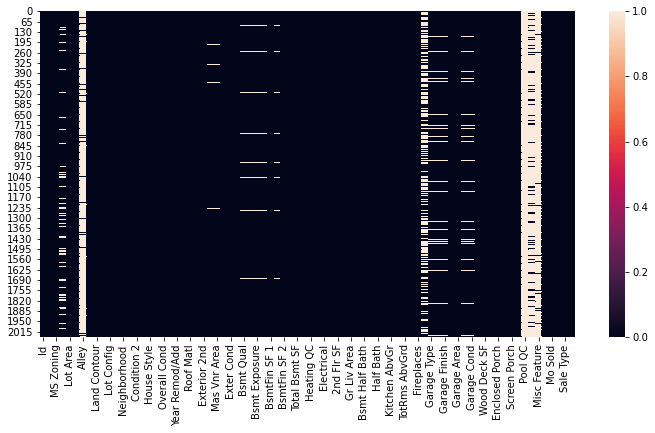

In [63]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_train.isnull())
plt.show()

In [64]:
#define a function to plot the null value bar chart distribution
def plot_null(df):
    df = pd.DataFrame(df)
    df.columns = ['% of records']
    df.index.names = ['features']
    df['features'] = df.index
    
    plt.figure(figsize = (13,5))
    sns.set(style='whitegrid')
    sns.barplot(x='features', y='% of records', data=df)
    plt.xticks(rotation=90)
    plt.show()
    return

In [65]:
def get_null_coulmns(df):
    isnull = df.isnull().sum()/len(df) * 100 
    isnull = isnull[isnull >0]
    isnull.sort_values(ascending = False, inplace = True)
    print (f"there are {len(isnull)} features have null values, and their % of missing records are listed:")
    return(isnull)

In [66]:
train_null = get_null_coulmns(df_train)
train_null

there are 26 features have null values, and their % of missing records are listed:


Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
BsmtFin SF 1       0.048757
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Garage Area        0.048757
Total Bsmt SF      0.048757
dtype: float64

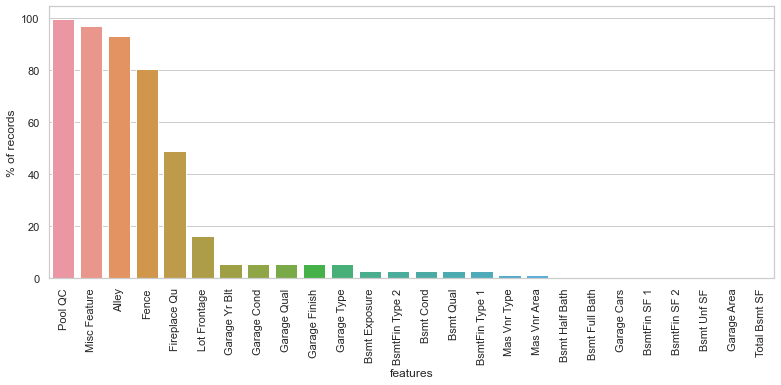

In [67]:
plot_null(train_null)

## Comments:

As We can see from the chart and description, in total there are 26 features have missing valaues in Train dataset, and I am going to do further inspection & handling in following steps.

## 4.3 Check missing values on test dataset

In [68]:
df_test.columns[df_test.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

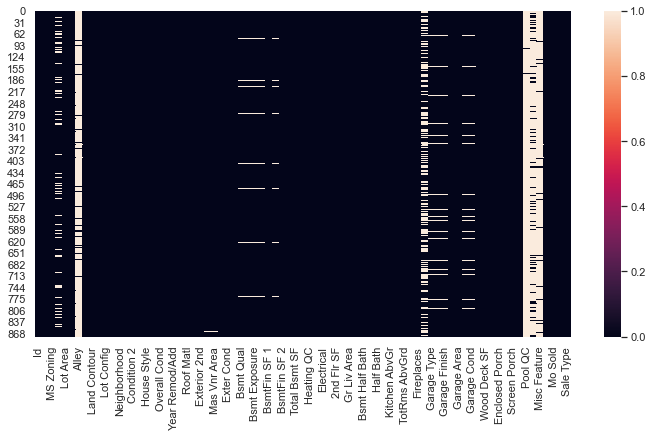

In [69]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_test.isnull())
plt.show()

In [70]:
# to get % of all columns that have null values in test dataset
test_null = get_null_coulmns(df_test)
test_null

there are 19 features have null values, and their % of missing records are listed:


Pool QC           99.544419
Misc Feature      95.330296
Alley             93.394077
Fence             80.410023
Fireplace Qu      48.063781
Lot Frontage      18.223235
Garage Yr Blt      5.125285
Garage Finish      5.125285
Garage Qual        5.125285
Garage Cond        5.125285
Garage Type        5.011390
BsmtFin Type 2     2.847380
BsmtFin Type 1     2.847380
Bsmt Exposure      2.847380
Bsmt Cond          2.847380
Bsmt Qual          2.847380
Mas Vnr Area       0.113895
Mas Vnr Type       0.113895
Electrical         0.113895
dtype: float64

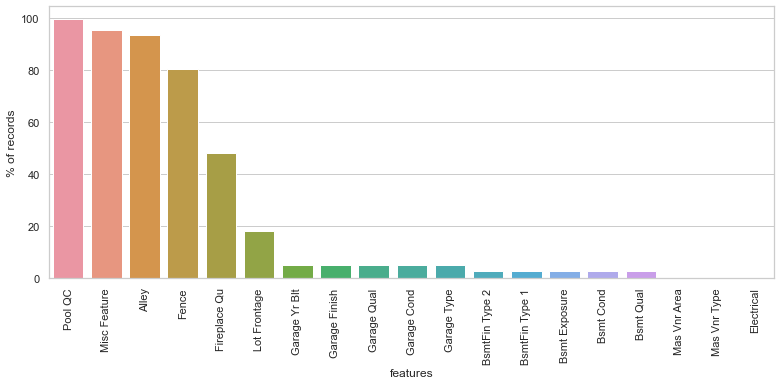

In [71]:
plot_null(test_null)

## Comments:

As We can see from the chart and description, in total there are less features have missing valaues in Test dataset compared the data in Train dataset, and I am going to do further inspection & handling in following steps.

Also almost are common null features in both train & test dataset, and by referring to the data dictionary there are reasonable features value with NA or 0 values. So I will fill Null values as NA or 0 for below features in 5.3.1 part.

## 4.4 Missing Value handling for both Train & Test Datasets

### 4.4.1 Fill Value- na by Data Dictionary for train & test datasets (ordinal & nominal)

In [72]:
# for Nonimal data: There's None value for 4 columns based on Data Dictionary: Alley, Mas Vnr Type, Garage Type,Misc Feature
# to get % of all columns that have null values in train dataset for nominal columns
nominal_null_train = get_null_coulmns(df_train[nominal_cols])
nominal_null_train

there are 4 features have null values, and their % of missing records are listed:


Misc Feature    96.830814
Alley           93.174061
Garage Type      5.509508
Mas Vnr Type     1.072647
dtype: float64

In [73]:
# for Ordinal data: There's None value for 11 columns based on Data Dictionary: Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, 
# BsmtFinType 2, FireplaceQu, Garage Finish, Garage Qual
# Garage Cond, Pool QC, Fence.
# to get % of all columns that have null values in test dataset for ordinal columns
ordinal_null_train = get_null_coulmns(df_train[ordinal_cols])
ordinal_null_train

there are 11 features have null values, and their % of missing records are listed:


Pool QC           99.561190
Fence             80.497318
Fireplace Qu      48.756704
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
BsmtFin Type 1     2.681619
Bsmt Cond          2.681619
Bsmt Qual          2.681619
dtype: float64

In [74]:
# for Nonimal data: There's None value for 4 columns based on Data Dictionary: Alley, Mas Vnr Type, Garage Type,Misc Feature
# to get % of all columns that have null values in train dataset for nominal columns
nominal_null_test = get_null_coulmns(df_test[nominal_cols])
nominal_null_test

there are 4 features have null values, and their % of missing records are listed:


Misc Feature    95.330296
Alley           93.394077
Garage Type      5.011390
Mas Vnr Type     0.113895
dtype: float64

In [75]:
# for Nonimal data: There's None value for 4 columns based on Data Dictionary: Alley, Mas Vnr Type, Garage Type,Misc Feature
# to get % of all columns that have null values in train dataset for nominal columns
ordinal_null_test = get_null_coulmns(df_test[ordinal_cols])
ordinal_null_test

there are 12 features have null values, and their % of missing records are listed:


Pool QC           99.544419
Fence             80.410023
Fireplace Qu      48.063781
Garage Cond        5.125285
Garage Qual        5.125285
Garage Finish      5.125285
BsmtFin Type 2     2.847380
BsmtFin Type 1     2.847380
Bsmt Exposure      2.847380
Bsmt Cond          2.847380
Bsmt Qual          2.847380
Electrical         0.113895
dtype: float64

## Comments:
For both train & test dataset:
- they have same 4 common columns nominal data have null values
- but for ordinal data, test dataset has 1 additional column "Electrical" with null value (0.11%). 

In [76]:
# Fill NA based on the Data Dictionary (all common missing fields in both train & test data)
col_na_okay = ['Alley', 'Mas Vnr Type', 'Garage Type', 'Misc Feature',
               'Pool QC','Fence','Fireplace Qu','Garage Cond','Garage Qual','Garage Finish','Bsmt Exposure',
               'BsmtFin Type 2','BsmtFin Type 1', 'Bsmt Cond','Bsmt Qual']
df_train[col_na_okay] = df_train[col_na_okay].fillna(value='na')
df_test[col_na_okay] = df_test[col_na_okay].fillna(value='na')

### 4.4.2 Fill Value- na for 'Electrical' in test dataset (nominal data)

In [77]:
# From the Data Dictionary, these 2 fields mentioned about Electricity --Utilities & Electrical 
df_test[['Utilities','Electrical']][df_test['Electrical'].isnull()]

,Utilities,Electrical
634,AllPub,NaN


In [78]:
df_test[['Utilities','Electrical']][df_test['Utilities'] == 'AllPub'].groupby('Electrical').count() 

,Utilities
Electrical,
FuseA,47
FuseF,15
FuseP,1
SBrkr,813


In [79]:
# Using most frequent Electrical type "SBrkr" value to fill NA Eelectrical
df_test['Electrical'] = df_test['Electrical'].fillna(value='SBrkr')

In [80]:
# to get % of all columns that have null values in test dataset for continuous columns
continuous_null_train = get_null_coulmns(df_train[continuous_cols])
continuous_null_train

there are 7 features have null values, and their % of missing records are listed:


Lot Frontage     16.089712
Mas Vnr Area      1.072647
Garage Area       0.048757
Total Bsmt SF     0.048757
Bsmt Unf SF       0.048757
BsmtFin SF 2      0.048757
BsmtFin SF 1      0.048757
dtype: float64

### 4.4.3 Continuous & Discrete Missing data Inspection on train & test datasets

In [81]:
continuous_null_train = get_null_coulmns(df_train[continuous_cols])
continuous_null_train

there are 7 features have null values, and their % of missing records are listed:


Lot Frontage     16.089712
Mas Vnr Area      1.072647
Garage Area       0.048757
Total Bsmt SF     0.048757
Bsmt Unf SF       0.048757
BsmtFin SF 2      0.048757
BsmtFin SF 1      0.048757
dtype: float64

In [82]:
discrete_null_train = get_null_coulmns(df_train[discrete_cols])
discrete_null_train

there are 4 features have null values, and their % of missing records are listed:


Garage Yr Blt     5.558264
Bsmt Half Bath    0.097513
Bsmt Full Bath    0.097513
Garage Cars       0.048757
dtype: float64

In [83]:
continuous_null_test = get_null_coulmns(df_test[continuous_cols])
continuous_null_test

there are 2 features have null values, and their % of missing records are listed:


Lot Frontage    18.223235
Mas Vnr Area     0.113895
dtype: float64

In [84]:
discrete_null_test = get_null_coulmns(df_test[discrete_cols])
discrete_null_test

there are 1 features have null values, and their % of missing records are listed:


Garage Yr Blt    5.125285
dtype: float64

## Comments:

We can see most continuous & discrete featuers with missing values are under the garage & basement group, I will check them as groups for a better understanding these 2 groups of data.

### 4.4.3.1 Drop "Garage Yr Blt" column

In [85]:
#check garage data when "Garage Yr Blt" is null
df_train[garage_cols][df_train['Garage Yr Blt'].isnull()].groupby('Garage Type').count()

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
Garage Type,,,,,,
Detchd,0,1,0,0,1,1
na,0,113,113,113,113,113


In [86]:
df_test[garage_cols][df_test['Garage Yr Blt'].isnull()].groupby('Garage Type').count()

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
Garage Type,,,,,,
Detchd,0,1,1,1,1,1
na,0,44,44,44,44,44


## Comments:
"Garage Yr Blt" will be removed. 

In train data, total 114 rows with "Garage Yr Blt" year is empty is because of No Garage, and another 1 observation is Detached Garage.
In test data, total 45 rows with "Garage Yr Blt" year is empty is because of No Garage, and another 1 observation is Detached Garage.

Garage for the property could present by other garage fileds. 

In [87]:
# drop this column from test & train dataset
df_train.drop(columns = 'Garage Yr Blt', inplace = True)
df_test.drop(columns = 'Garage Yr Blt', inplace = True)

In [88]:
# remove this column from columns lists
garage_cols.remove('Garage Yr Blt')
discrete_cols.remove('Garage Yr Blt')

#add "Garage Yr Blt" into list of del_cols
del_cols.append('Garage Yr Blt')
del_cols

['PID', 'Garage Yr Blt']

In [89]:
# check data shape and ensure this column is deleted successfully
df_train.shape

(2051, 79)

In [90]:
df_test.shape

(878, 78)

In [91]:
garage_cols

['Garage Type',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

### 4.4.3.2 Drop "Lot Frontage" & "Mas Vnr Area"  columns

We don't have any clue to impute these 2 columns "Lot Frontage" & "Mas Vnr Area", and I will assume they could present by other columns for field "Lot Frontage", e.g. Lot Area, Street, Lot Shape, etc, thus. The 2nd field is the length of the intersection with the street where the house is located, I will assume it is not important for the property appraisal. Therefore, I decide to discard these 2 columns entirely to not have any deal with interpolating meaningful replacements for the missing values.

In [92]:
df_train.drop(columns = ['Lot Frontage', 'Mas Vnr Area'], inplace = True)
df_test.drop(columns =  ['Lot Frontage', 'Mas Vnr Area'], inplace = True)

In [93]:
continuous_cols.remove('Lot Frontage')
continuous_cols.remove('Mas Vnr Area')

#add "Garage Yr Blt" into list of del_cols
del_cols.append('Lot Frontage')
del_cols.append('Mas Vnr Area')
del_cols

['PID', 'Garage Yr Blt', 'Lot Frontage', 'Mas Vnr Area']

In [94]:
# check data shape and ensure these 2 columns is deleted successfully
df_train.shape

(2051, 77)

In [95]:
df_test.shape

(878, 76)

In [96]:
continuous_cols

['Lot Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

Now there are still some fields --garage & basement data with missing values.

### 4.4.3.3 Fill 0 for null "Garage Area" & "Garage Cars" columns

In [97]:
garage_null_train = get_null_coulmns(df_train[garage_cols])
garage_null_train

there are 2 features have null values, and their % of missing records are listed:


Garage Area    0.048757
Garage Cars    0.048757
dtype: float64

In [98]:
df_train[garage_cols][df_train['Garage Area'].isnull()]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,na,NaN,NaN,na,na


In [99]:
# No garage for this property
df_train['Garage Area'] = df_train['Garage Area'].fillna(0)
df_train['Garage Cars'] = df_train['Garage Cars'].fillna(0)

In [100]:
# ensure no null data for garage data
garage_null_train = get_null_coulmns(df_train[garage_cols])
garage_null_train

there are 0 features have null values, and their % of missing records are listed:


Series([], dtype: float64)

### 4.4.3.4 Fill 0 for null basement columns

In [101]:
basement_null_train = get_null_coulmns(df_train[basement_cols])
basement_null_train

there are 6 features have null values, and their % of missing records are listed:


Bsmt Half Bath    0.097513
Bsmt Full Bath    0.097513
Total Bsmt SF     0.048757
Bsmt Unf SF       0.048757
BsmtFin SF 2      0.048757
BsmtFin SF 1      0.048757
dtype: float64

In [102]:
df_train[basement_cols][df_train['Total Bsmt SF'].isnull()]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,na,na,na,na,NaN,na,NaN,NaN,NaN,NaN,NaN


In [103]:
df_train[basement_cols][df_train['Bsmt Half Bath'].isnull()]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,na,na,na,na,0.0,na,0.0,0.0,0.0,NaN,NaN
1327,na,na,na,na,NaN,na,NaN,NaN,NaN,NaN,NaN


No basement for these 2 houses, thus I will fillna as 0 value for all null basement columns.

In [104]:
df_train['Bsmt Half Bath'] = df_train['Bsmt Half Bath'].fillna(0)
df_train['Bsmt Full Bath'] = df_train['Bsmt Full Bath'].fillna(0)
df_train['Total Bsmt SF'] = df_train['Total Bsmt SF'].fillna(0)
df_train['Bsmt Unf SF'] = df_train['Bsmt Unf SF'].fillna(0)
df_train['BsmtFin SF 2'] = df_train['BsmtFin SF 2'].fillna(0)
df_train['BsmtFin SF 1'] = df_train['BsmtFin SF 1'].fillna(0)

## Comments:

Missing values have been done handling, I will check again by using missingno libraray.

### 4.4.4 Check again the missing values matrix for train data

<AxesSubplot:>

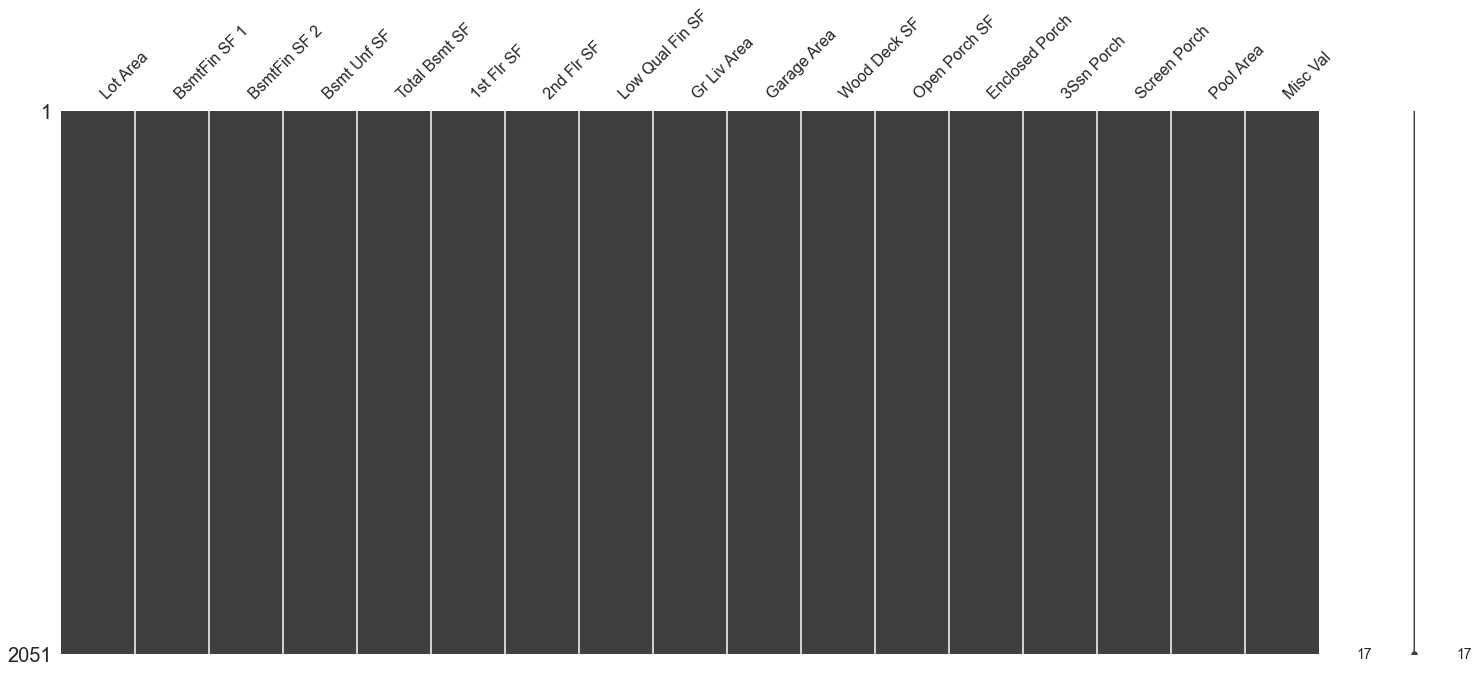

In [105]:
msno.matrix(df_train[continuous_cols])

<AxesSubplot:>

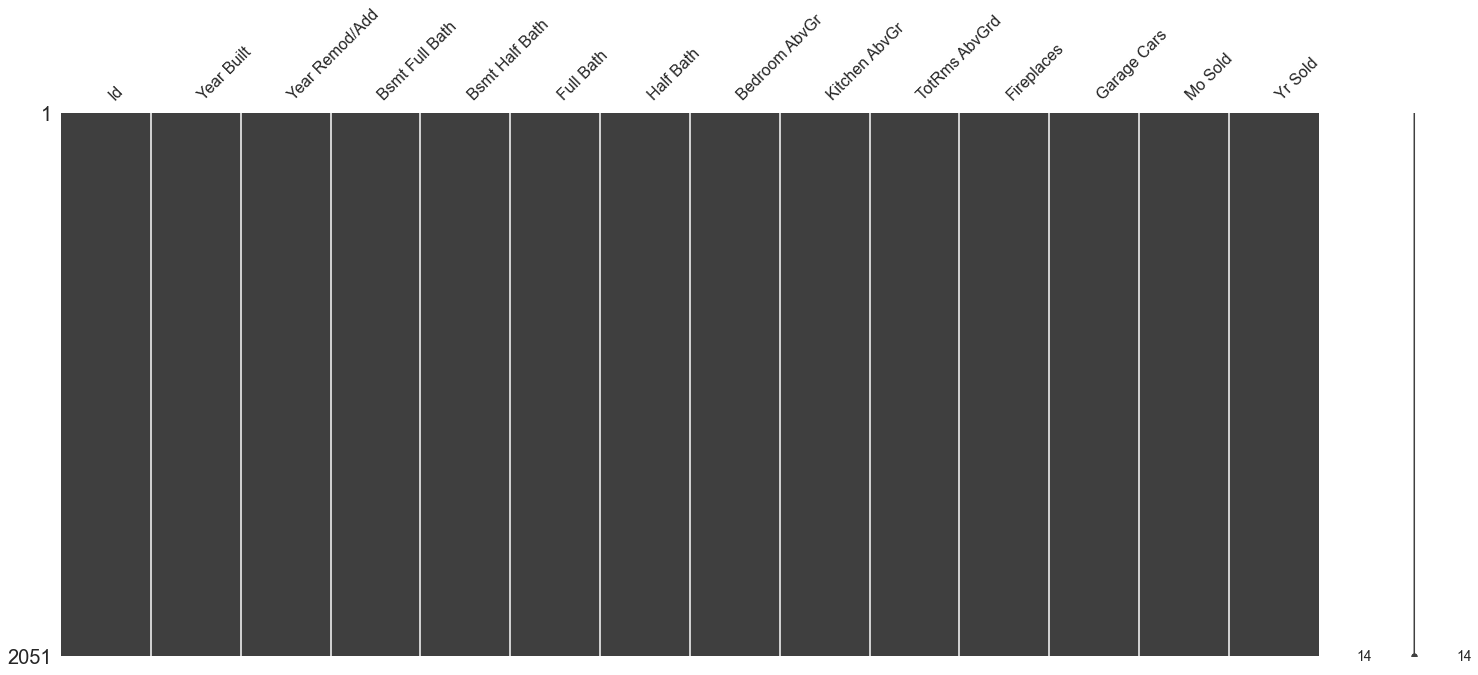

In [106]:
msno.matrix(df_train[discrete_cols])

<AxesSubplot:>

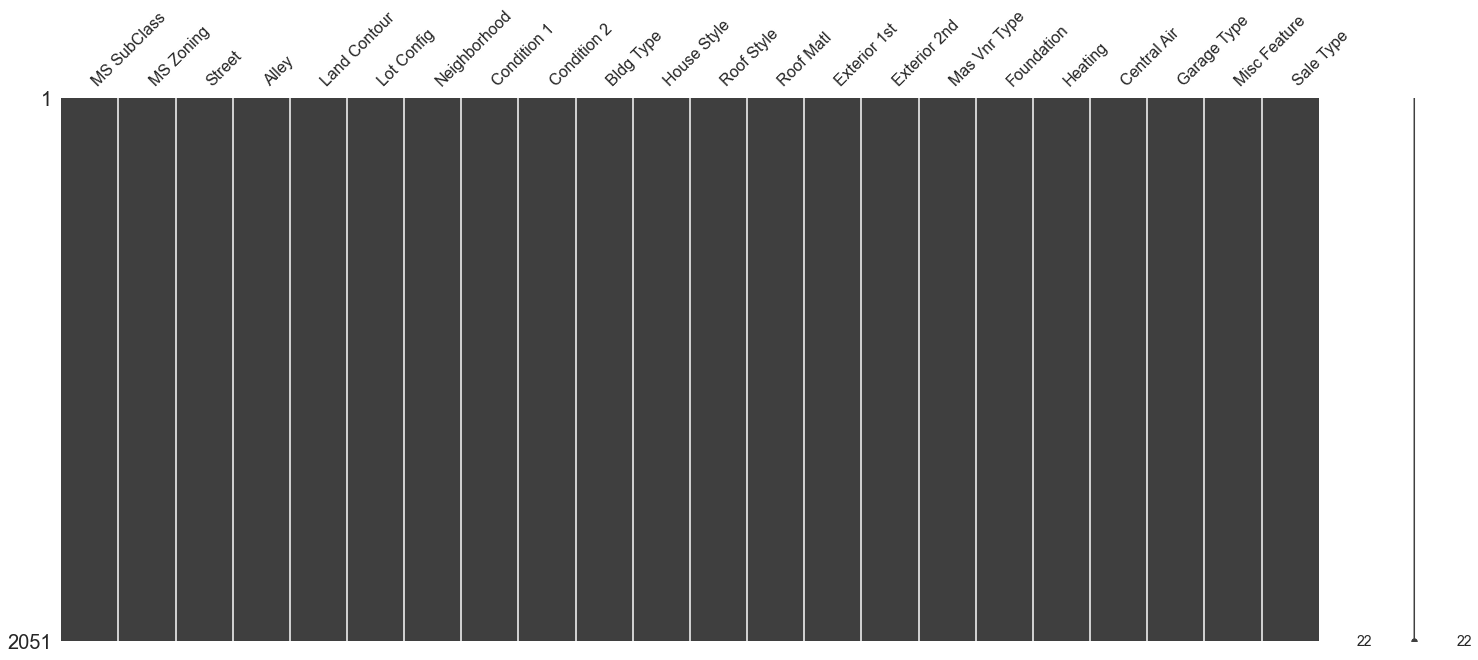

In [107]:
msno.matrix(df_train[nominal_cols])

<AxesSubplot:>

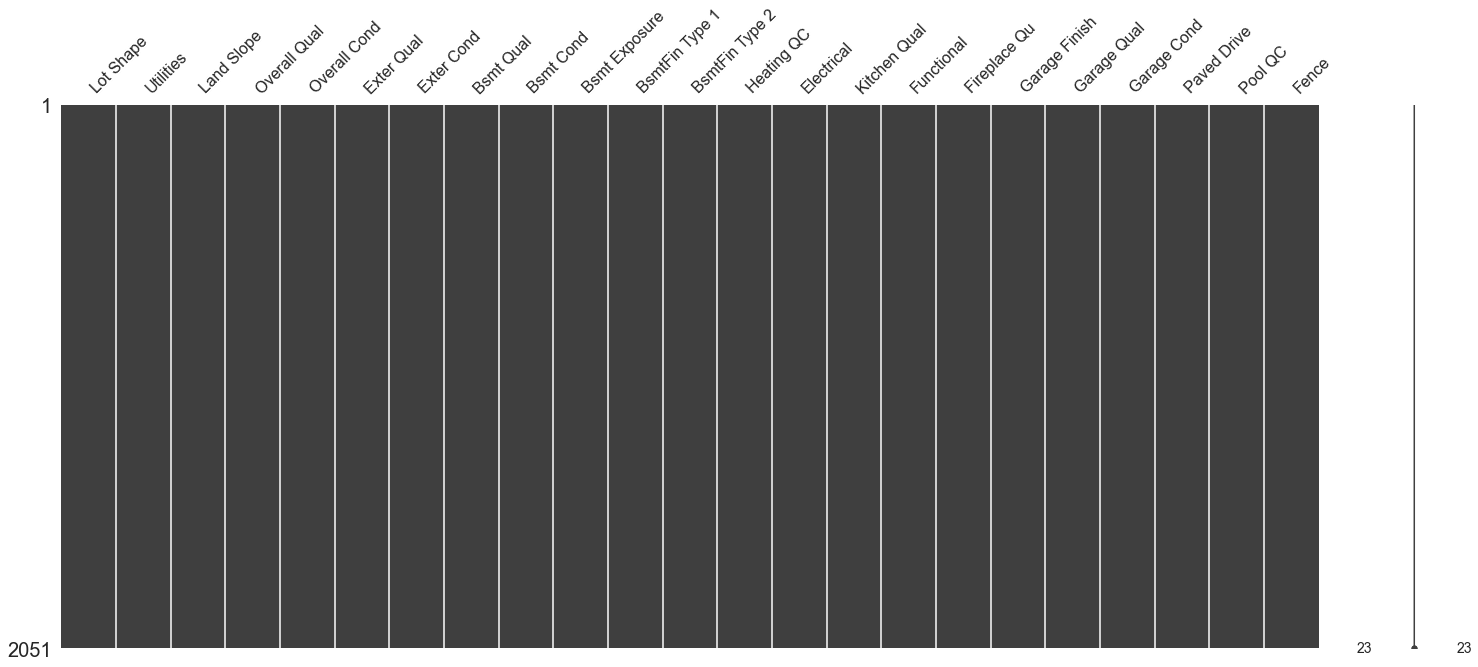

In [108]:
msno.matrix(df_train[ordinal_cols])

### 4.4.5 Check again the missing values matrix for test data

<AxesSubplot:>

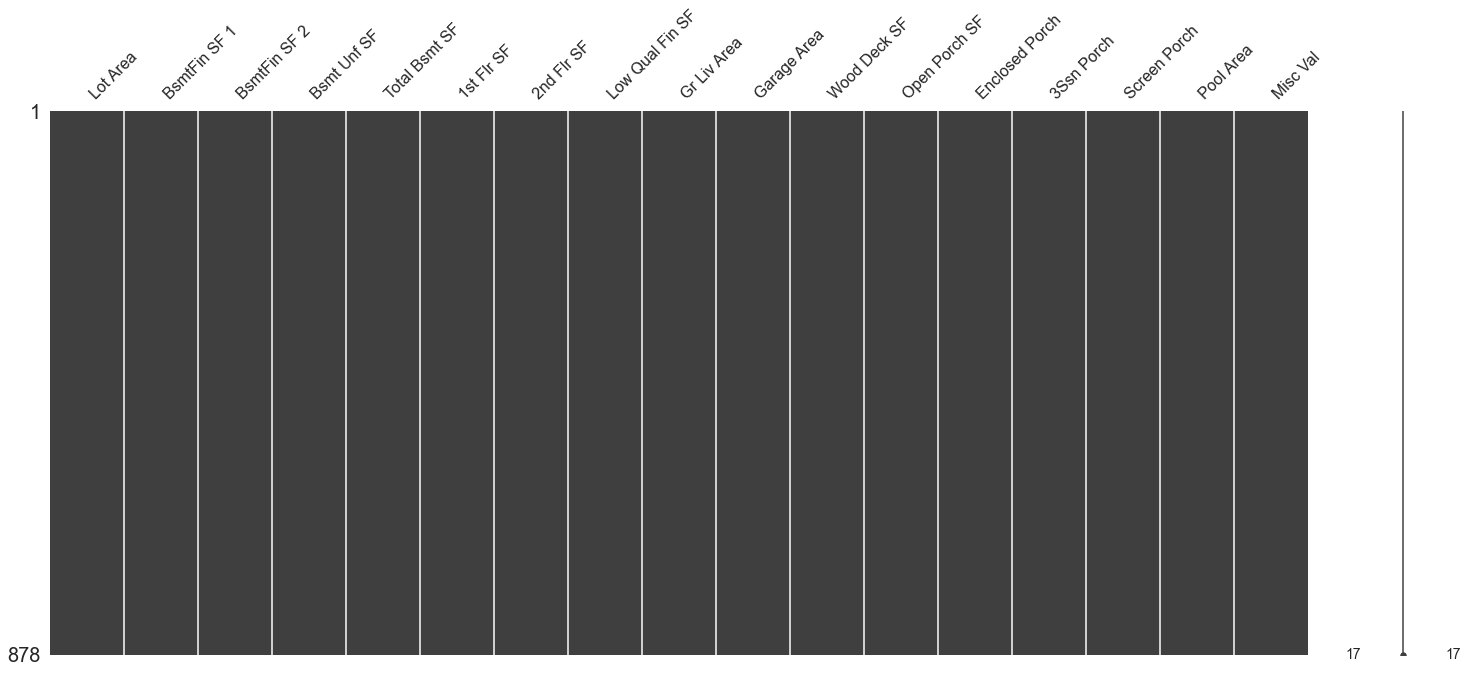

In [109]:
msno.matrix(df_test[continuous_cols])

<AxesSubplot:>

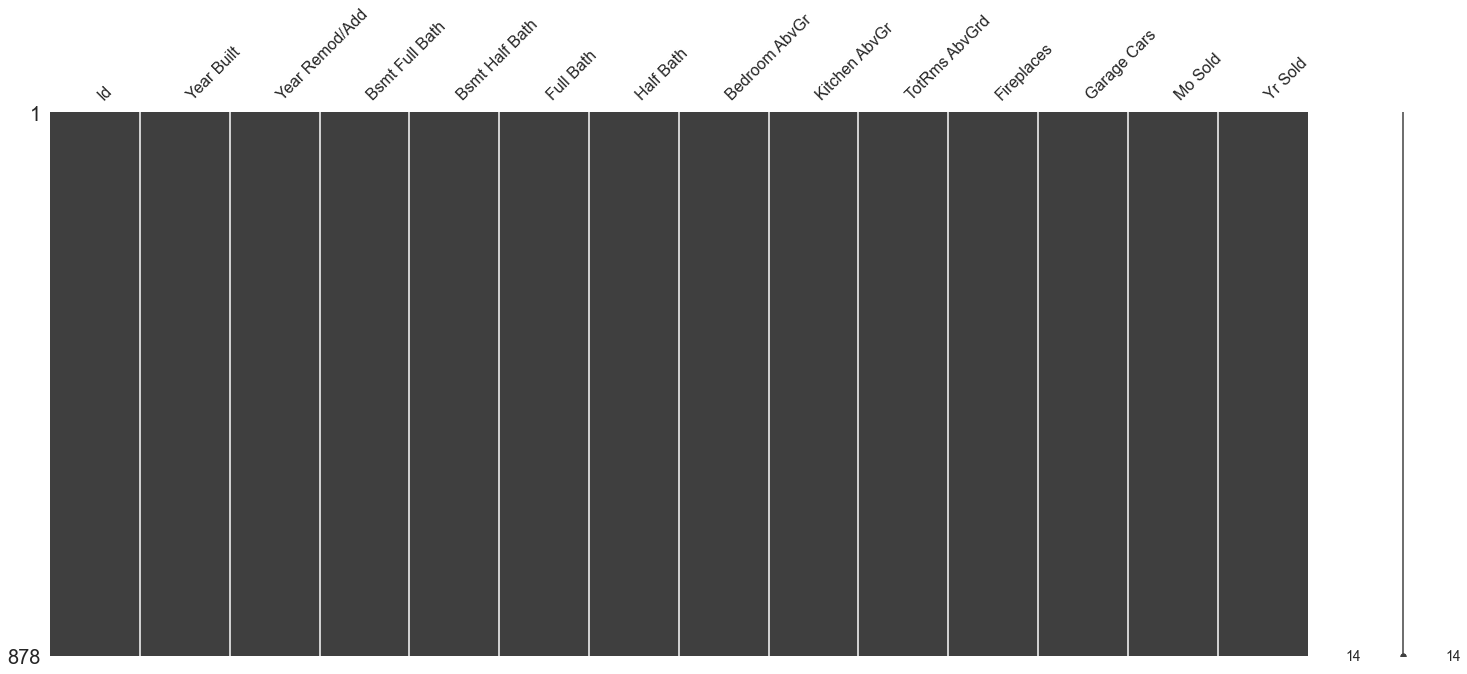

In [110]:
msno.matrix(df_test[discrete_cols])

<AxesSubplot:>

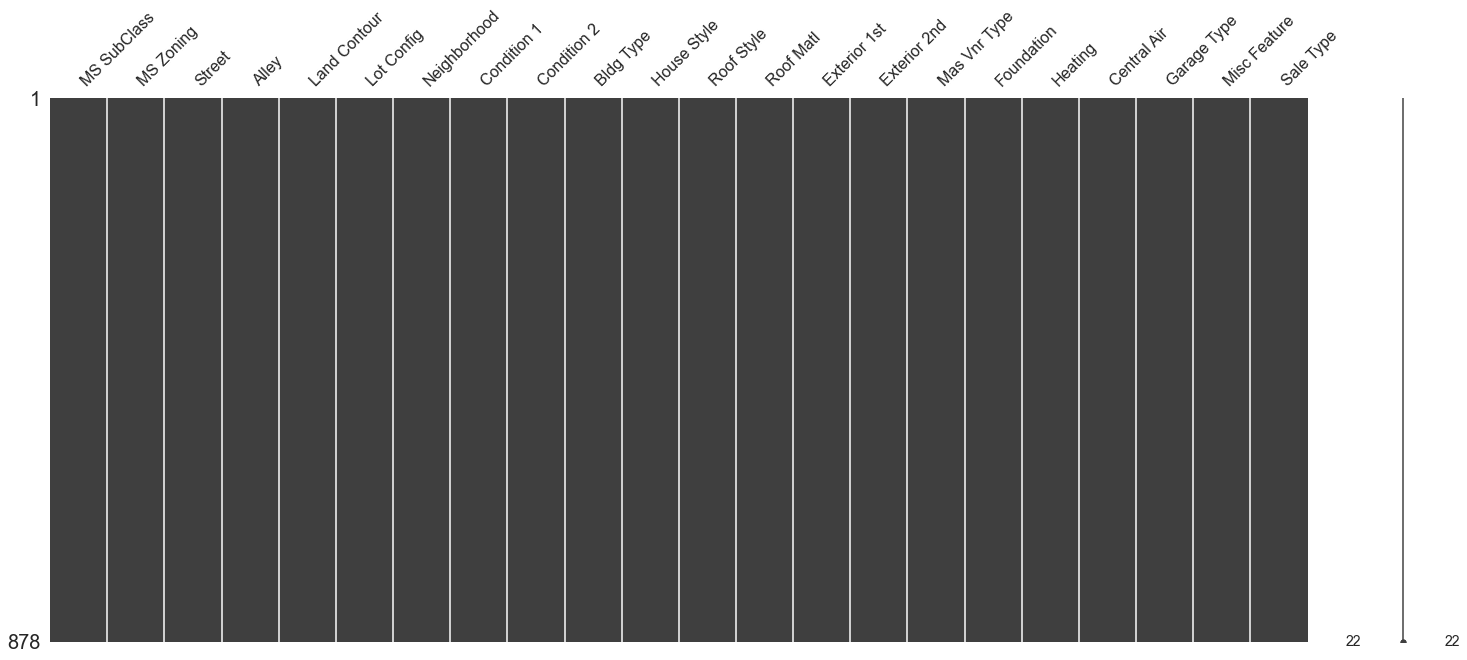

In [111]:
msno.matrix(df_test[nominal_cols])

<AxesSubplot:>

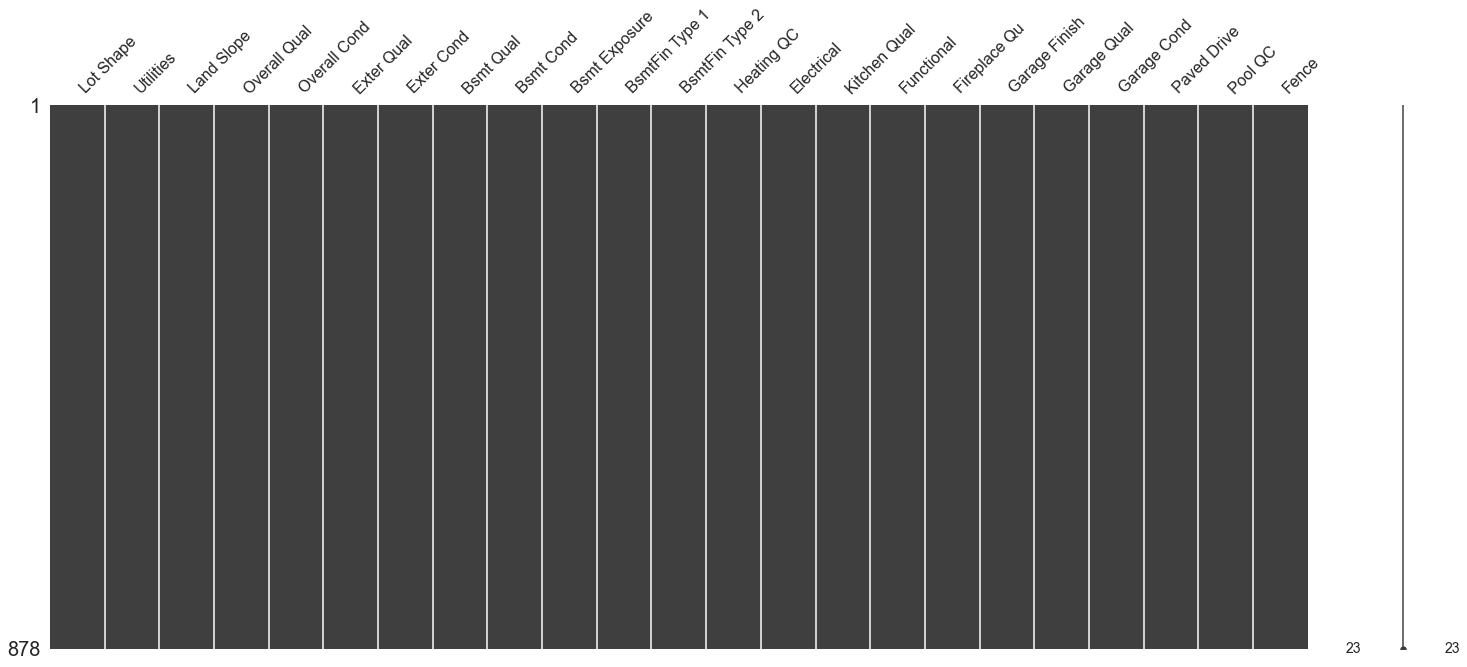

In [112]:
msno.matrix(df_test[ordinal_cols])

## Comments:
Confirm there's no more missing data for both train & test data.

## 4.5 Data Errors check

### 4.5.1 Data consistency check & correction

### 4.5.1.1 Basement Square Feet check

In [113]:
#Basement Square Feet check
# total basement SF should be the sum SF of Basement Type 1 finished SF, Basement Type 2 finished SF & Basement unfinished SF
df_train[basement_cols][df_train['Total Bsmt SF'] != df_train['BsmtFin SF 1'] + df_train['BsmtFin SF 2'] + df_train['Bsmt Unf SF']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath


In [114]:
df_test[basement_cols][df_test['Total Bsmt SF'] != df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2'] + df_test['Bsmt Unf SF']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath


## Comments:
There's no inconsistent data for basement data

### 4.5.1.2 Above ground living area square feet check

In [115]:
# Gr Liv Area = 1st Flr SF + 2nd Flr SF + Low Qual Fin SF
df_train[continuous_cols][df_train['Gr Liv Area'] != df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['Low Qual Fin SF']]

,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val


In [116]:
# Gr Liv Area = 1st Flr SF + 2nd Flr SF + Low Qual Fin SF
df_test[continuous_cols][df_test['Gr Liv Area'] != df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Low Qual Fin SF']]

,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val


## Comments:
There's no inconsistent data for above grade (ground) living area square feet

### 4.5.1.3 Total Rooms above ground check

In [117]:
#define a function to delete a list of variables b from list a
def remove_frm_list (a,b): 
    for x in b:
        try: 
            a.remove(x)
        except ValueError:
            pass
    
    return a

In [118]:
#define a function to append a list of variables b to list a
def append_to_list (a,b): 
    for x in b:
        try: 
            a.append(x)
        except ValueError:
            pass
    
    return a

In [119]:
# 'TotRms AbvGrd' should be 'Bedroom AbvGr' + 'Kitchen AbvGr' based on the definition of variable-"TotRms AbvGrd"
df_train[discrete_cols][df_train['TotRms AbvGrd'] !=df_train['Bedroom AbvGr'] + df_train['Kitchen AbvGr']]

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Mo Sold,Yr Sold
0,109,1976,2005,0.0,0.0,2,1,3,1,6,0,2.0,3,2010
1,544,1996,1997,1.0,0.0,2,1,4,1,8,1,2.0,4,2009
2,153,1953,2007,1.0,0.0,1,0,3,1,5,0,1.0,1,2010
3,318,2006,2007,0.0,0.0,2,1,3,1,7,0,2.0,4,2010
4,255,1900,1993,0.0,0.0,2,0,3,1,6,0,2.0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,2007,2007,1.0,0.0,2,0,3,1,7,1,2.0,1,2008
2047,785,1940,1950,0.0,0.0,1,0,1,1,4,0,2.0,3,2009
2048,916,1928,1950,0.0,0.0,1,1,3,1,9,1,2.0,3,2009
2049,639,1956,1956,1.0,0.0,1,0,3,1,6,2,1.0,11,2009


In [120]:
# Create a new field for "TotRms AbvGrd" in train ata
df_train['TotRms AbvGrd_new'] = df_train['Bedroom AbvGr'] + df_train['Kitchen AbvGr']

In [121]:
# Create a new field for "TotRms AbvGrd" in test ata
df_test['TotRms AbvGrd_new'] = df_test['Bedroom AbvGr'] + df_test['Kitchen AbvGr']

In [122]:
# To avoid multicollinearity in features, I will remove these columns

to_remove = ['TotRms AbvGrd', 'Bedroom AbvGr','Kitchen AbvGr' ]

discrete_cols= remove_frm_list(discrete_cols,to_remove) # remove columns from discrete cols

del_cols = append_to_list(del_cols, to_remove) # append these columns to del_cols to store all dropped columns

df_train.drop(columns = to_remove, inplace = True)
df_test.drop(columns = to_remove, inplace = True)

In [123]:
#Add newly created feature into their respective feature group

discrete_cols.append('TotRms AbvGrd_new')
new_cols.append('TotRms AbvGrd_new')

In [124]:
discrete_cols

['Id',
 'Year Built',
 'Year Remod/Add',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'TotRms AbvGrd_new']

In [125]:
del_cols

['PID',
 'Garage Yr Blt',
 'Lot Frontage',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Bedroom AbvGr',
 'Kitchen AbvGr']

In [126]:
new_cols

['TotRms AbvGrd_new']

In [127]:
df_train.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       '

## Comments:
There are 2034 rows that with data inconsistency of rooms count calculated, I have created a new column - TotRms AbvGrd_new has created to repace of all other features-'TotRms AbvGrd', 'Bedroom AbvGr','Kitchen AbvGr', and thse 3 columns have been dropped to avoid multicollinearity for the Linear Regression Model.

## 4.6 Check Outliers 

The instructors' notes state:

> **Five observations** that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these
points). Three of them are true **outliers** (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced
relatively appropriately). I would **recommend removing any houses with more than
4000 square feet** from the data set (which eliminates these five unusual observations)
before assigning it to students.

<AxesSubplot:title={'center':'Gr Live Area vs Sale Price'}, xlabel='Gr Liv Area', ylabel='SalePrice'>

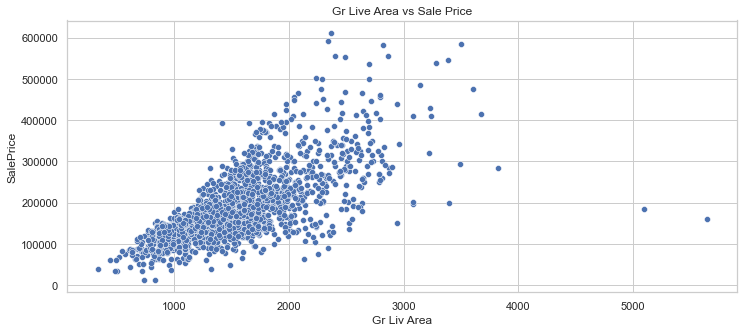

In [128]:
# a plot of SALE PRICE versus GR LIV AREA 
plt.figure(figsize=(12,5))
plt.title('Gr Live Area vs Sale Price')
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_train)

## Comments:
We can very clearly that there are 2 observations with Gr Live Area > 4000 square feet. We will remove them.

In [129]:
#drop 2 observations with Gr Live Area > 4000 square feet from train data
index_names = df_train[df_train["Gr Liv Area"] >= 4000].index
df_train.drop(index_names, inplace = True)

In [130]:
df_train.shape

(2049, 75)

In [131]:
df_test.shape

(878, 74)

## 4.7 Pre-processing based on Data Dictionary

In [132]:
# Check ordinal columns and fill with a specified value
def check_ordinal_col(df, col,possible_values,fill_value):
    df[col] = df[col].fillna(fill_value)
    values = set(df[col])
    if not values.issubset(possible_values):
         print(f"Problem with {col}.")                 
    return

In [133]:
# Coming up with a function to transform ordinal columns
def clean_ordinal_col(df, col, dict_values,fill_value):
    possible_values = dict_values.keys()
    check_ordinal_col(df, col,possible_values,fill_value)

    for key,value in dict_values.items():
        df[col] = df[col].map(lambda cell: cell.replace(key,str(value)))
    df[col] = df[col].astype(int)                       
    return

In [134]:
df_train['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [135]:
col = 'Lot Shape'
dict_values = {'Reg':1,
               'IR1' : 2,
               'IR2' : 3,
               'IR3' : 4, }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [136]:
df_train['Utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [137]:
col = 'Utilities'
dict_values = {'AllPub':1,
               'NoSeWa' : 2,
               'NoSewr' : 3 }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [138]:
df_train['Land Slope'].unique()

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [139]:
col = 'Land Slope'
dict_values = {'Gtl':1,
               'Sev' : 2,
               'Mod' : 3 }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [140]:
df_train['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [141]:
df_test['Heating QC'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [142]:
cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
               'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']
dict_values = {'Ex': 5,
               'TA' : 4,
               'Gd' : 3,
               'Fa' : 2, 
               'Po' : 1,
               'na' : 0} 
for col in cols:
    clean_ordinal_col(df_train, col, dict_values, 0)
    
for col in cols:
    clean_ordinal_col(df_test, col, dict_values, 0)

In [143]:
df_train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'na', 'Mn'], dtype=object)

In [144]:
col = 'Bsmt Exposure'
dict_values = {'Gd':4,
               'Av' : 3,
               'Mn' : 2,
               'No': 1,
               'na': 0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [145]:

df_train['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'na', 'BLQ', 'LwQ'], dtype=object)

In [146]:
col = 'BsmtFin Type 1'
dict_values = {'GLQ':6,
               'ALQ' : 5,
               'BLQ' : 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf':1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [147]:
df_train['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', 'na', 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [148]:
col = 'BsmtFin Type 2'
dict_values = {'GLQ':6,
               'ALQ' : 5,
               'BLQ' : 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf':1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [149]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [150]:
col = 'Electrical'
dict_values = {'SBrkr':5,
               'FuseA' : 4,
               'FuseF' : 3,
               'FuseP': 2,
               'Mix': 1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [151]:
df_train['Functional'].unique()

array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
      dtype=object)

In [152]:
col = 'Functional'
dict_values = {'Typ':7,
               'Min1' : 6,
               'Min2' : 5,
               'Mod': 4,
               'Maj1': 3,
               'Maj2': 2,
               'Sev':1,
               'Sal':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [153]:
df_train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', 'na'], dtype=object)

In [154]:
col = 'Garage Finish'
dict_values = {'Fin':3,
               'RFn': 2,
               'Unf': 1,
               'na': 0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [155]:
df_train['Paved Drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [156]:
col = 'Paved Drive'
dict_values = {'Y':3,
               'P': 2,
               'N': 1}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [157]:
df_train['Fence'].unique()

array(['na', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [158]:
col = 'Fence'
dict_values = {'GdPrv':4,
               'MnPrv': 3,
               'GdWo': 2,
               'MnWw': 1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)

In [159]:
#check if all ordinal columns have transformed
df_train[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Shape       2049 non-null   int32
 1   Utilities       2049 non-null   int32
 2   Land Slope      2049 non-null   int32
 3   Overall Qual    2049 non-null   int64
 4   Overall Cond    2049 non-null   int64
 5   Exter Qual      2049 non-null   int32
 6   Exter Cond      2049 non-null   int32
 7   Bsmt Qual       2049 non-null   int32
 8   Bsmt Cond       2049 non-null   int32
 9   Bsmt Exposure   2049 non-null   int32
 10  BsmtFin Type 1  2049 non-null   int32
 11  BsmtFin Type 2  2049 non-null   int32
 12  Heating QC      2049 non-null   int32
 13  Electrical      2049 non-null   int32
 14  Kitchen Qual    2049 non-null   int32
 15  Functional      2049 non-null   int32
 16  Fireplace Qu    2049 non-null   int32
 17  Garage Finish   2049 non-null   int32
 18  Garage Qual     2049 non-nul

## 4.7 Export Cleaned Data 

### 4.7.1 Export all features and their types

In [160]:
path = path +"part1/"

In [161]:
# Define a DataFrame of latest updated features and features types
df_features= pd.DataFrame({'FeatureName':continuous_cols + discrete_cols + nominal_cols + ordinal_cols + target_variable,
                     'FeatureType': ""})

In [162]:
for col in df_features['FeatureName']:
    if col in continuous_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Continuous"
    elif col in discrete_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Discrete"
    elif col in nominal_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Nominal"  
    elif col in ordinal_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Ordinal"
    else:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Target"

In [163]:
df_features.head()

,FeatureName,FeatureType
0,Lot Area,Continuous
1,BsmtFin SF 1,Continuous
2,BsmtFin SF 2,Continuous
3,Bsmt Unf SF,Continuous
4,Total Bsmt SF,Continuous


In [164]:
df_features.groupby("FeatureType").count()

,FeatureName
FeatureType,
Continuous,17
Discrete,12
Nominal,22
Ordinal,23
Target,1


In [165]:
df_features.shape

(75, 2)

In [166]:
print(len(continuous_cols + discrete_cols + nominal_cols + ordinal_cols + target_variable))

75


In [167]:
# exported updated columns (exclude deleted columns & include created column)
df_features.to_csv(path + "All_Features_cleaned_part1.csv", index = False)

### 4.7.2 Export Added & Removed Features

In [168]:
# Define a DataFrame for deleted & added features
df_features= pd.DataFrame({'FeatureName':del_cols + new_cols,
                     'Del/Add': ""})

df_features

,FeatureName,Del/Add
0,PID,
1,Garage Yr Blt,
2,Lot Frontage,
3,Mas Vnr Area,
4,TotRms AbvGrd,
5,Bedroom AbvGr,
6,Kitchen AbvGr,
7,TotRms AbvGrd_new,


In [169]:
for col in df_features['FeatureName']:
    if col in del_cols:
        df_features.loc[df_features['FeatureName']==col, 'Del/Add'] = "Deleted"
    elif col in new_cols:
        df_features.loc[df_features['FeatureName']==col, 'Del/Add'] = "Added"

In [170]:
df_features.groupby("Del/Add").count()

,FeatureName
Del/Add,
Added,1
Deleted,7


In [171]:
# exported updated columns (exclude deleted columns & include created column)
df_features.to_csv(path + "Del_Add_Features_part1.csv", index = False)

### 4.7.3 Export Cleaned Data

In [172]:
#check train & test data have some columns and same column sequence
df_train.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       '

In [173]:
df_train.shape

(2049, 75)

In [174]:
df_test.shape

(878, 74)

In [175]:
df_test.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       '

In [176]:
# exported updated columns (exclude deleted columns & include created column)
df_train.to_csv(path + "train_clean_after_part1.csv", index = False)
df_test.to_csv(path + "test_clean_after_part1.csv", index = False)

## 5. EDA & Data Visualization

### 5.1. Correlation Analysis(Pearson's Correlation)

I will use a bivariate Pearson Correlation to test whether there is a statistically significant linear relationship between all features and target variable-Sales Price, and to determine the strength and direction of the association.

The Pearson correlation coefficient, r, can take a range of values from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases. 

In [177]:
#define a function to plot the coefficient bar chart distribution
def plot_coefficient(df, title):
    
    plt.figure(figsize = (13,5))
    sns.set(style='whitegrid')
    sns.barplot(y='features', x='Coefficient Values', data=df)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

    return

In [178]:
# plot correlation

def plot_correlation(corr, title):
    sns.set_theme(style="white")
    # Increase the size of the heatmap.
    plt.figure(figsize=(25, 9))
    
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    
    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(corr, mask=mask,vmin=-1, vmax=1, annot=True, cmap=cmap)

    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title(title, fontdict={'fontsize':16}, pad=12);

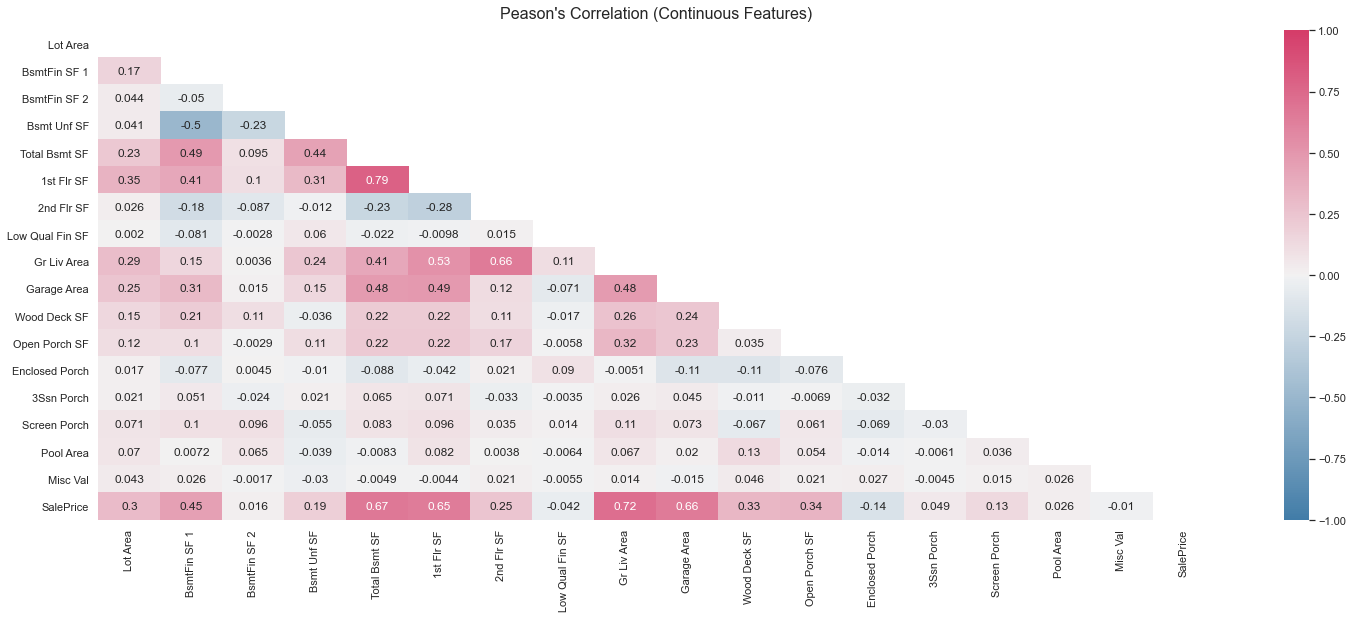

In [179]:
corr_cont = df_train[continuous_cols + target_variable].corr(method = "pearson")
plot_correlation(corr_cont, "Peason's Correlation (Continuous Features)")

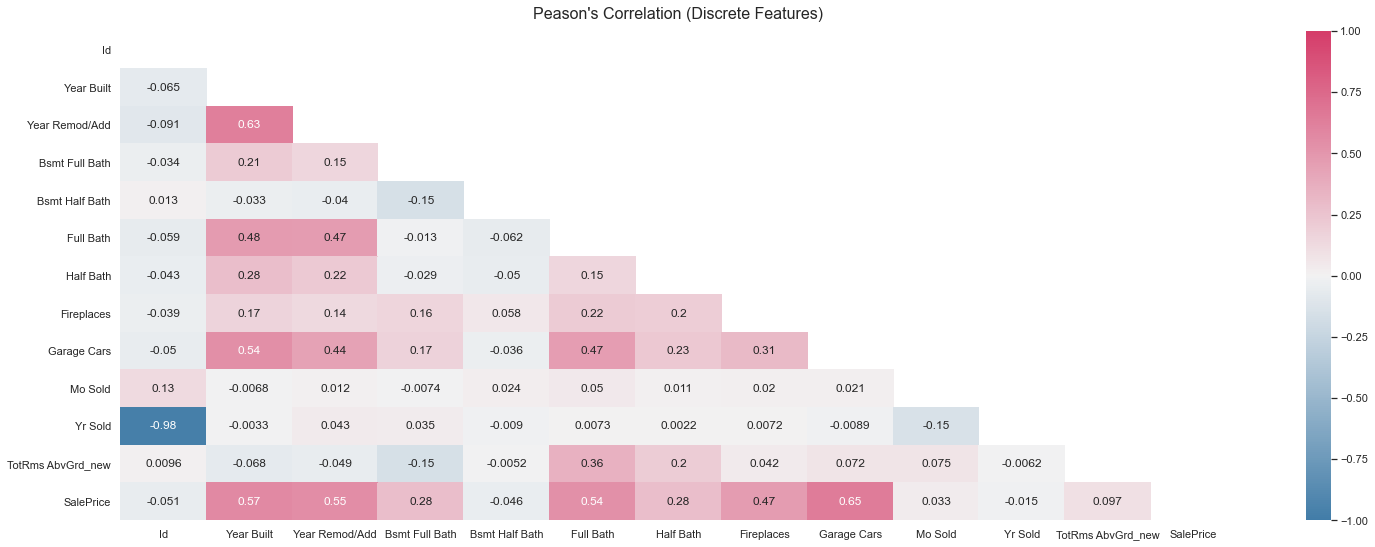

In [180]:
cols = discrete_cols + target_variable
corr_disc = df_train[cols].corr(method = "pearson")
plot_correlation(corr_disc, "Peason's Correlation (Discrete Features)")

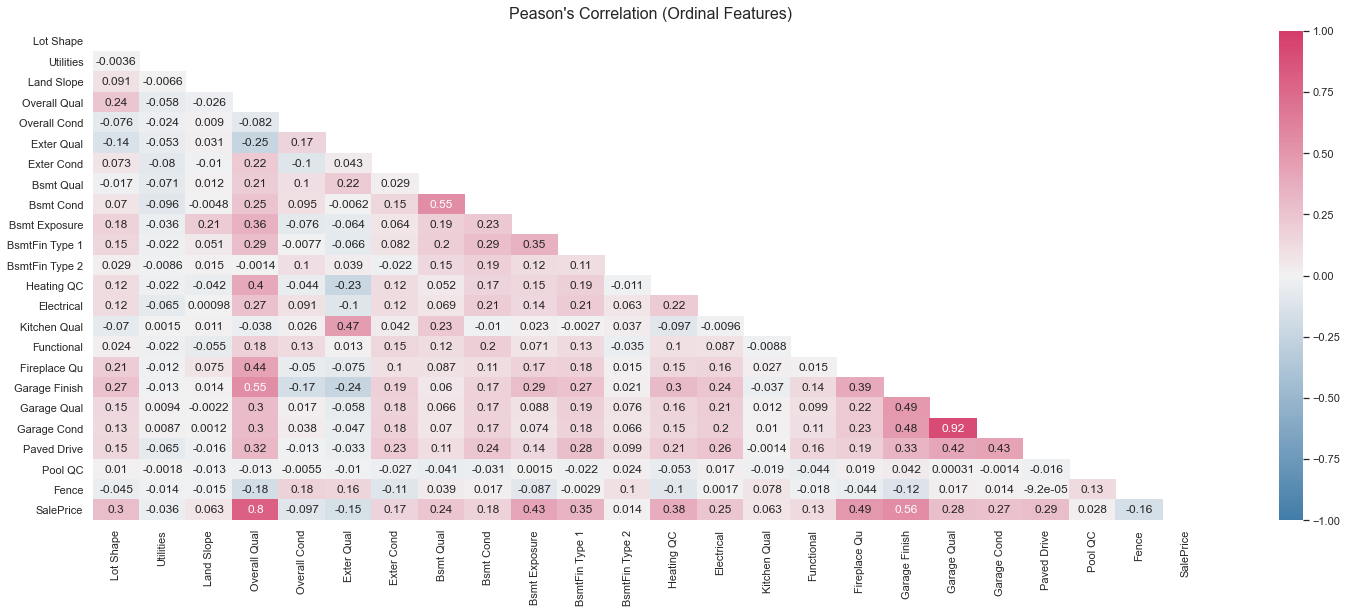

In [181]:
cols = ordinal_cols + target_variable
corr_ord = df_train[cols].corr(method = "pearson")
plot_correlation(corr_ord, "Peason's Correlation (Ordinal Features)")

In [182]:
 #create a dataframe to store all features' coefficient to target Sales price
def create_df_coef(corrs):
    df = pd.DataFrame(corrs)
    df.columns = ['Coefficient Values']
    df.index.names = ['features']
    df['features'] = df.index
    df.drop(index='SalePrice', inplace= True)
    
    return(df)

In [183]:
# transform the coefficient matrix into 2 datafram
corrs_1 = corr_cont[['SalePrice']].abs()
corrs_2 = corr_disc[['SalePrice']].abs()
corrs_3 = corr_ord[['SalePrice']].abs()

df_1 = create_df_coef(corrs_1)
df_2 = create_df_coef(corrs_2)
df_3 = create_df_coef(corrs_3)

### 5.2. Correlation Analysis:(Spearman's Rank Correlation)

Spearman's correlation coefficient shows an ordinal rank relationship between two variables.

In [184]:
# label encoder
def label_encoder(cols):
    
    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame()
    
    for i in cols:
        data_encoded[i] = label.fit_transform(df_train[i])
    
    return(data_encoded)

In [185]:
# build the Cramer's V function

def cramers_v(col1, col2):
    
    #build cross table
    crosstab = np.array(pd.crosstab(col1, col2))
    
    #keep of the test statistic of the chi2 test
    stat = chi2_contingency(crosstab)[0]
    #get no. of observations
    obs = np.sum(crosstab)
    #take the minimum value between the columns and thr rows of the cross table
    mini = min(crosstab.shape) -1
    
    return(stat/(obs*mini))

In [186]:
# Build the correlatin matrix

def cramerV_matrix(data):
    rows = []
    for col1 in data:
        col = []
        for col2 in data:
            cramers = cramers_v(data[col1], data[col2])
            col.append(round(cramers,2))
        rows.append(col)
    
    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns = data.columns, index = data.columns)
    
    return(df)

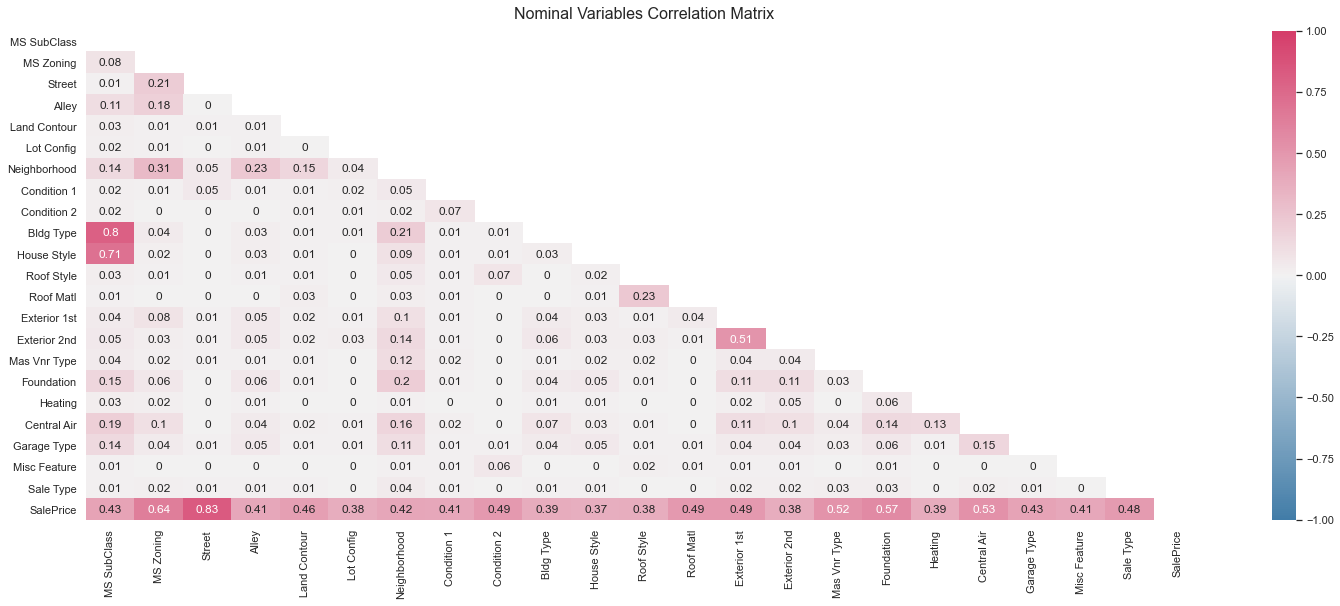

In [187]:
# do LabelEncoder & building of the Cramer's V function for Ordinal & Nominal Variables & target variable
nomi_categorical = label_encoder(nominal_cols + target_variable)
df_cat_matrix = cramerV_matrix(nomi_categorical)
plot_correlation(df_cat_matrix,"Nominal Variables Correlation Matrix")

### 5.3. Strong Correlated Features to Target Variable (by thredhold 0.6)

In [188]:
# transform the coefficient matrix into datafram
corrs_4 = df_cat_matrix['SalePrice'].abs()
df_4 = create_df_coef(corrs_4)

In [189]:
df_coeff = df_1.append(df_2, ignore_index=True)
df_coeff = df_coeff.append(df_3, ignore_index= True)
df_coeff = df_coeff.append(df_4, ignore_index= True)
df_coeff

,Coefficient Values,features
0,0.303744,Lot Area
1,0.446103,BsmtFin SF 1
2,0.016398,BsmtFin SF 2
3,0.190883,Bsmt Unf SF
4,0.665116,Total Bsmt SF
...,...,...
69,0.390000,Heating
70,0.530000,Central Air
71,0.430000,Garage Type
72,0.410000,Misc Feature


In [190]:
df_coeff.sort_values(by=['Coefficient Values'], ascending=False, inplace=True)

In [191]:
print(df_coeff[df_coeff['Coefficient Values'] >0.6])

    Coefficient Values       features
54            0.830000         Street
32            0.803462   Overall Qual
8             0.719463    Gr Liv Area
4             0.665116  Total Bsmt SF
9             0.655097    Garage Area
5             0.648252     1st Flr SF
25            0.648227    Garage Cars
53            0.640000      MS Zoning


For a naive feature selection a "rule of thumb" classification in weak and strong correlation is applied to the predictor variables. The identified variables will be used in the prediction modelling part to speed up the feature selection. A correlation is above 0.6 is considered strong correlated (the theshold refers to the absolute value of the correlation)

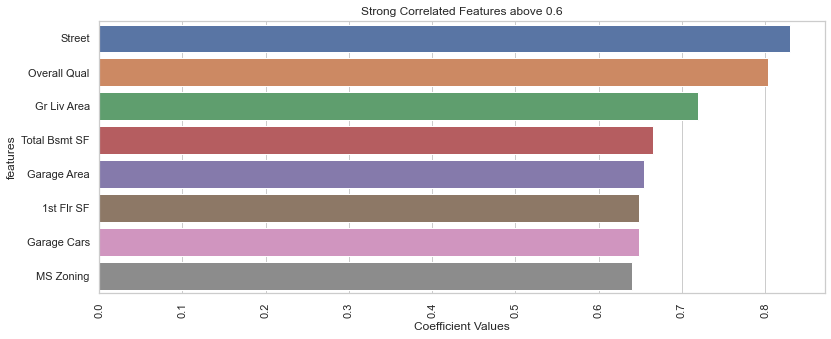

In [192]:
# Most commonly We assume the correlation >0.6 are highly correlated features influence to the target variable-Sales price.

strongly_correlated = df_coeff[df_coeff['Coefficient Values'] >0.6]
title = "Strong Correlated Features above 0.6"
plot_coefficient(strongly_correlated, title)

In [193]:
# save highly correlated features into highly_correlated_features.csv
strongly_correlated.to_csv(path + "highly_corr_features_after_part1.csv", index = False)

## Comments:



These are features with strong correlation to the target-Sales Price, and their coefficient value:

1. Street: 0.830000
2. Gr Liv Area, 0.719463
3. Overall Qual, 0.700000
4. Exter Qual, 0.680000
5. Total Bsmt SF, 0.665116
6. Garage Area, 0.655097
7. 1st Flr SF, 0.648252
8. Garage Cars, 0.648227
9. MS Zoning, 0.640000
10. Kitchen Qual, 0.620000          

## 5.4 Features EDA

Besides of the highly correlated features indentified in above steps, I will do further inspection on the relationships on other features.

## 5.4.1 Street

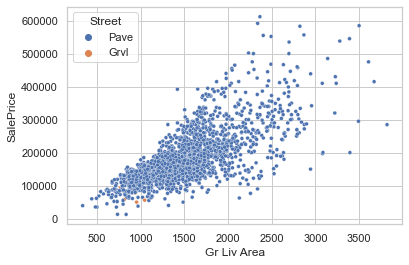

In [194]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", hue="Street", s=15, data=df_train);

## Comments:

Most road access of the house is Paved, though from the correlation analysis it shows Street has the highest correlation to house sales price, but from the plot, this feature might not be an interesting predictor.

## 5.4.2 Neighborhoods

Usually the house price is highly influenced by the location with the consideration of work & life convenience and enviroment facilities. Our data is for Ames, We can take a closer look at the Neighborhoods which also implies the house location fator. 

<ipython-input-195-6ed44a8e06a6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Text(0, 0.5, 'Neighborhood')

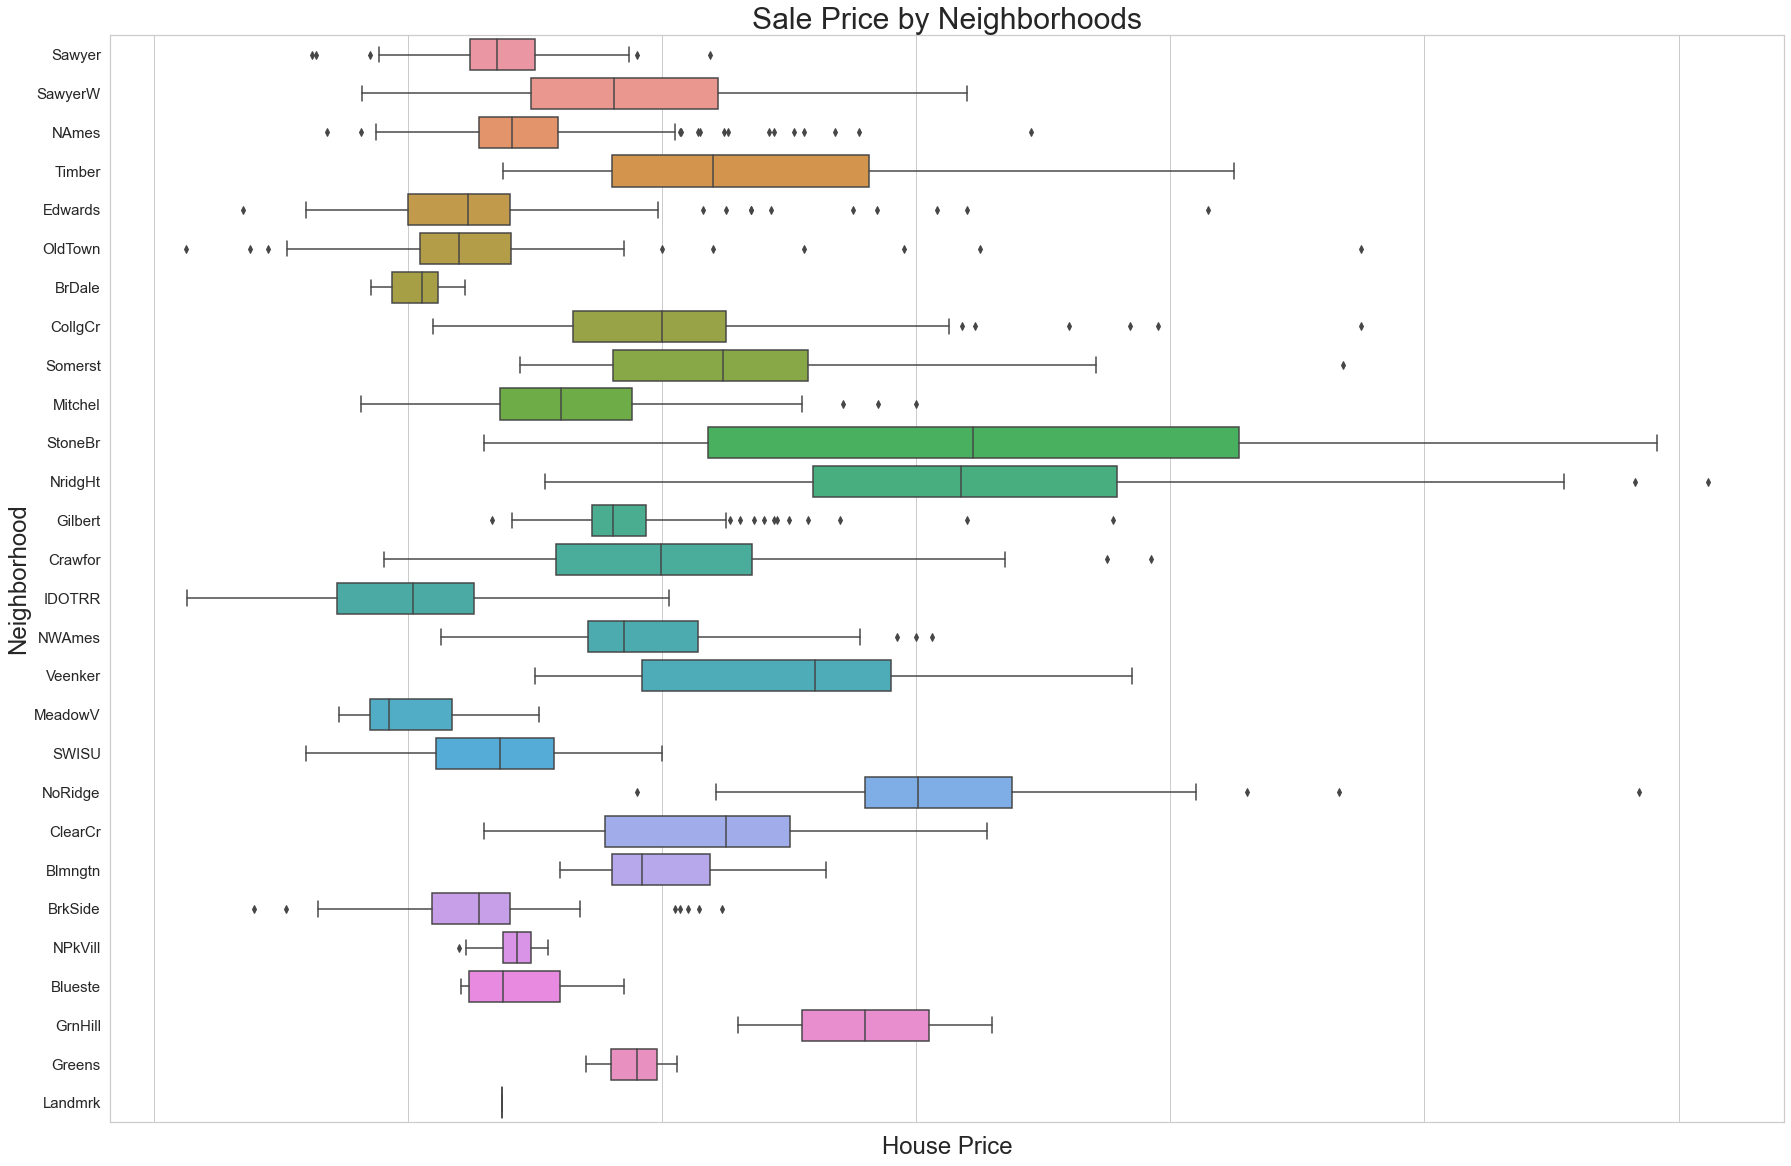

In [195]:
#boxplot of Neighborhood 
_, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(y="Neighborhood", x="SalePrice", data=df_train, ax=ax, orient = 'h')
ax.set_title("Sale Price by Neighborhoods", fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tick_params(labelsize=15)
ax.set_xlabel("House Price", fontsize=24);
ax.set_ylabel("Neighborhood", fontsize=24)

## Comments:

1. Different Neighborhoods have different range of the sales price.
2. Top 3 Neighborhoods that have average higher Sales Price:
    - Stone Brook
    - Northridge Heights
    - Northridge 
If the house located are neighbor with these 3 locations, the house prices tend to be sold with a higher price.

## 5.4.3 MS Zoning

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'MS Zoning vs Sale Price'}, xlabel='MS Zoning', ylabel='SalePrice'>

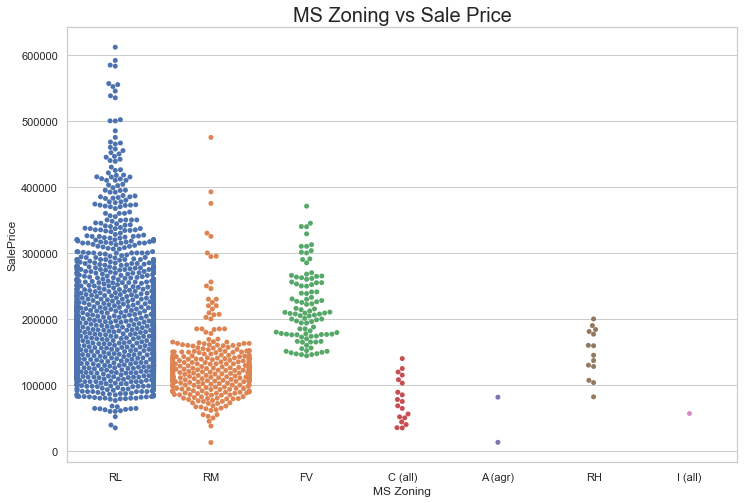

In [196]:
plt.figure(figsize=(12,8))
plt.title('MS Zoning vs Sale Price', fontsize=20)
sns.swarmplot(x='MS Zoning', y='SalePrice', data=df_train)

In [197]:
df_train.groupby(['MS Zoning']).agg({"SalePrice":["mean","median","max","min","count"]})

SalePrice                              
                    mean  median     max     min count
MS Zoning                                             
A (agr)     47300.000000   47300   81500   13100     2
C (all)     78010.894737   75000  140000   34900    19
FV         218618.316832  208900  370878  144152   101
I (all)     57625.000000   57625   57625   57625     1
RH         148859.571429  152217  200000   82000    14
RL         191259.362782  172500  611657   35000  1596
RM         129119.142405  123900  475000   12789   316

## Comments:
1. Most houses are located in a residential zone.
2. Another distinct Zone-Floating Village Residential with 101 houses been sold, has higher sales price compared to other residential zone houses, its mean sales price is 218k. 

## 5.4.4 House Type/Style-MS SubClass, House Style, Building Type

### 5.4.4.1 Building Type

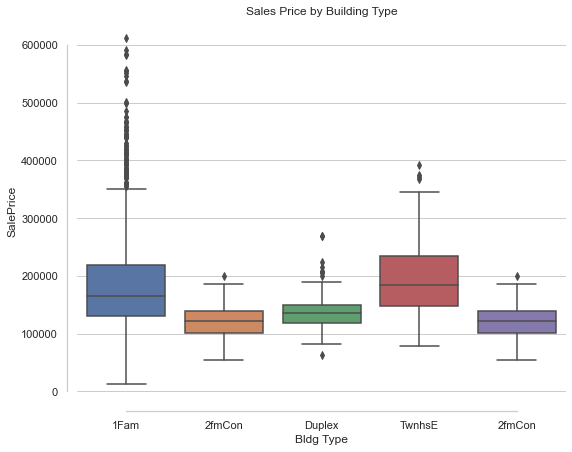

In [198]:
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_train, x='Bldg Type', y='SalePrice', order=["1Fam", "2fmCon", "Duplex", "TwnhsE", "2fmCon"])
ax.set_title("Sales Price by Building Type")
sns.despine(offset=10, trim=True)
#plt.xticks(rotation=90)
plt.show()

## Comments:

1. The Sales Price varies for different Building types
2. Townhouse End Unit has the highest Sales price, and followed by Single-family detached houses.

### 5.4.4.2 House Style

In [199]:
df_train['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

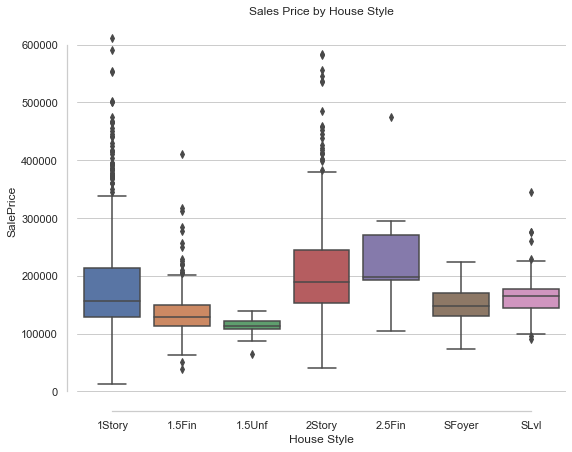

In [200]:
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_train, x='House Style', y='SalePrice', order=['1Story', '1.5Fin', '1.5Unf','2Story','2.5Fin','SFoyer', 'SLvl'  ])
ax.set_title("Sales Price by House Style")
sns.despine(offset=10, trim=True)
#plt.xticks(rotation=90)
plt.show()

## Comments:

1. The Sales Price varies for different house types
2. The Two Story has the highest Sales price, and "One and one-half story: 2nd level unfinished" has the lowest sales price, the completeness of the house may affect to the house sales price.

### 5.4.4.3 MS SubClass

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the p

<AxesSubplot:title={'center':'MS SubClass vs Sale Price'}, xlabel='MS SubClass', ylabel='SalePrice'>

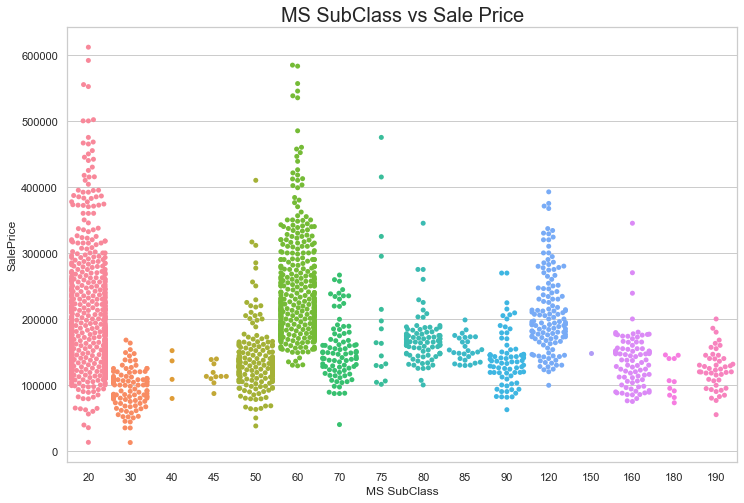

In [201]:
plt.figure(figsize=(12,8))
plt.title('MS SubClass vs Sale Price', fontsize=20)
sns.swarmplot(x='MS SubClass', y='SalePrice', data=df_train)

## Comments:
From the swarm plot, it can be observed that majority of the transaction were 1 story houses (MS SubClass label = 20) that were built in 1946 or newer. This type of house tend to fetch higher sale price as well.
2 story houses (MS SubClass label = 60) that were built in 1946 or newer were also popular houses. This kind of houses fetches the higest sale price. It has the second highest transaction volume.

## 5.5 Age of house built/remodel

Text(0.5, 1.0, 'Year Built vs Sale Price')

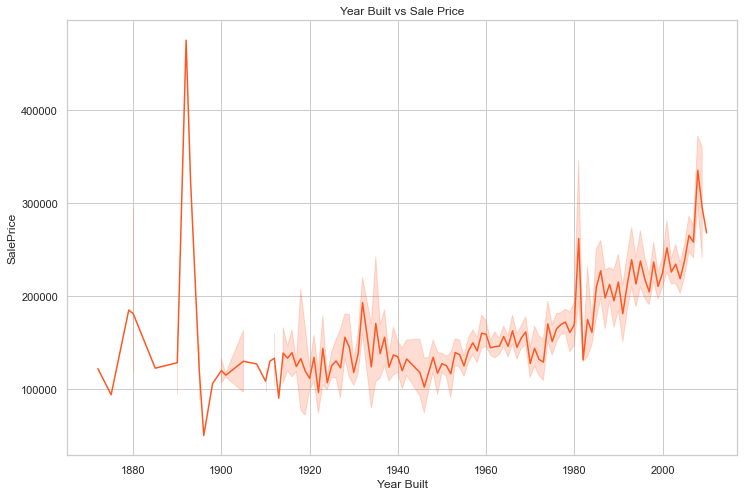

In [202]:
# year built plot
plt.figure(figsize=(12,8))
sns.set_palette(['#FF5722'])
sns.lineplot(data=df_train,x='Year Built', y='SalePrice')
ax = plt.gca()
ax.set_title('Year Built vs Sale Price')

Text(0.5, 1.0, 'Year Built vs Sale Price')

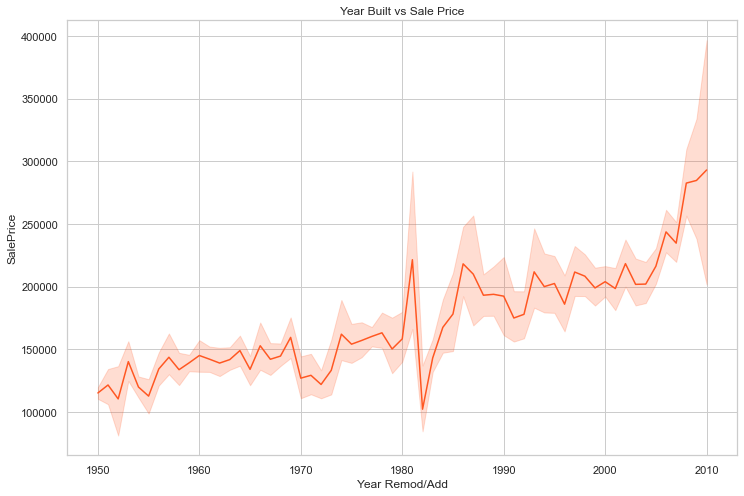

In [203]:
# year built plot
plt.figure(figsize=(12,8))
sns.set_palette(['#FF5722'])
sns.lineplot(data=df_train,x='Year Remod/Add', y='SalePrice')
ax = plt.gca()
ax.set_title('Year Built vs Sale Price')

## Comments:

Both 2 charts show the newly built/remodel houses the higher house sales price.

## 5.6 House Quality

### 5.6.1 Exterior Quality

<AxesSubplot:title={'center':'Exterior Quality vs Sale Price'}, xlabel='Exter Qual', ylabel='SalePrice'>

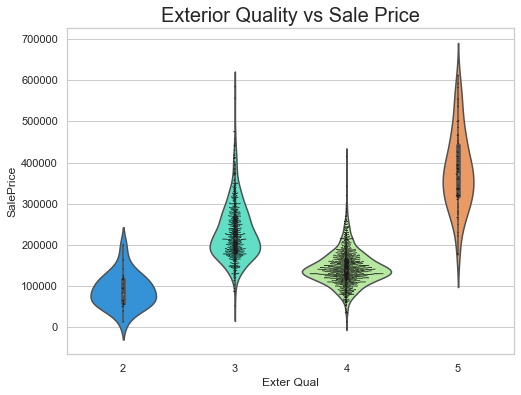

In [204]:
plt.figure(figsize=(8,6))
plt.title('Exterior Quality vs Sale Price', fontsize=20)
df_train= df_train.sort_values(by = "SalePrice", ascending = True)
sns.violinplot(x='Exter Qual', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Exter Qual', y='SalePrice', data=df_train, color='black', size=1)

In [206]:
df_train.groupby('Exter Qual').agg({'SalePrice':['mean','min','max']})

SalePrice                
                     mean     min     max
Exter Qual                               
2            89801.192308   13100  200000
3           230802.484935   52000  584500
4           143270.978348   12789  415000
5           379587.784810  176500  611657

## Comments:

1. Theres's positive correlation between Exterier Qulity and House Sales Price, the better Kitchen Quality the higher price the house would sold

2. By comparing the statistics of different Exterier Kitchen Quality:
    - The Excellent Quality Exterier houses on average would sell as 3.3 times higher compared to Fair quality kitchen houses
    - The Good Quality Exterier houses on average would sell as 2 times higher compared to Fair quality kitchen houses
This will give a prompt to home sellers, if they aim to increase their house price, they can consider to upgrade their exterior to a better quality. But generally there might be a big investment on the exterior upgrading. Let's look at the Kitchen Quality.

### 5.6.2 Kitchen Quality

<AxesSubplot:title={'center':'Kitchen Quality vs Sale Price'}, xlabel='Kitchen Qual', ylabel='SalePrice'>

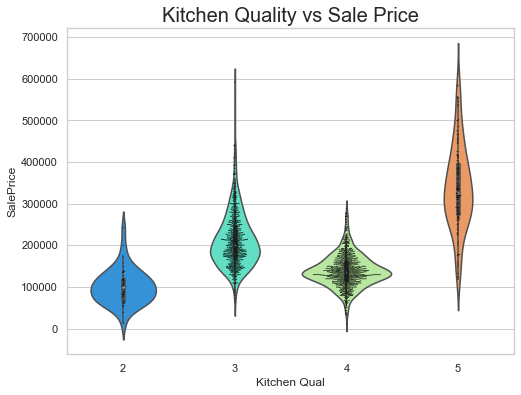

In [207]:
plt.figure(figsize=(8,6))
plt.title('Kitchen Quality vs Sale Price', fontsize=20)
df_train= df_train.sort_values(by = "SalePrice", ascending = True)
sns.violinplot(x='Kitchen Qual', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Kitchen Qual', y='SalePrice', data=df_train, color='black', size=1)

In [209]:
df_train.groupby('Kitchen Qual').agg({'SalePrice':['mean','min','max']})

SalePrice                
                       mean     min     max
Kitchen Qual                               
2             101334.957447   13100  242500
3             211629.451613   64500  591587
4             139501.607450   12789  289000
5             338632.510067  119000  611657

## Comments:

1. Theres's positive correlation between Kitchen Qulity and House Sales Price, the better Kitchen Quality the higher price the house would sold

2. By comparing the statistics of different level Kitchen Quality:
    - The Excellent Quality kitchen houses on average would sell as 3.3 times higher compared to Fair quality kitchen houses
    - The Good Quality kitchen houses on average would sell as 2 times higher compared to Fair quality kitchen houses
This will give a prompt to home sellers, if they aim to increase their house price, they can consider to upgrade their kitchen to a better quality. Comparing to upgrad the exterior of your house, it would be a smaller amount of investment on kitchen upgrading instead.

### 5.6.4 Overall Quality

<AxesSubplot:title={'center':'Overall Quality vs Sale Price'}, xlabel='Overall Qual', ylabel='SalePrice'>

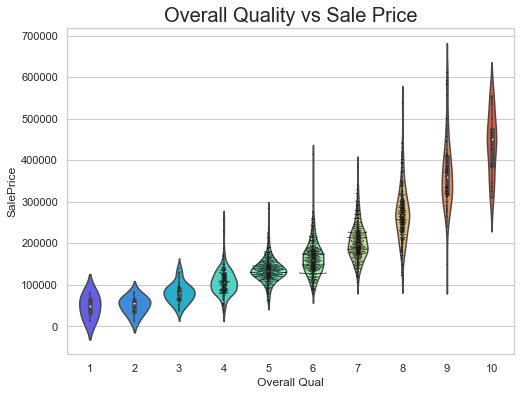

In [210]:
plt.figure(figsize=(8,6))
plt.title('Overall Quality vs Sale Price', fontsize=20)
sns.violinplot(x='Overall Qual', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Overall Qual', y='SalePrice', data=df_train, color='black', size=1)

In [211]:
df_train.groupby('Overall Qual').agg({'SalePrice':['mean','min','max']})

SalePrice                
                       mean     min     max
Overall Qual                               
1              48725.000000   13100   81500
2              51081.000000   12789   82000
3              81309.103448   37900  139600
4             107744.037736   34900  256000
5             134963.644760   55993  284700
6             162891.102767   79000  415000
7             203430.285383  105000  383970
8             271437.044000  122000  538000
9             370197.376623  150000  611657
10            440774.809524  310000  555000

## Comment:

1. The Violin chart can show there is strong positive correlation between Overall Quality and House Sales Price, the better of the overall materails & completeness of the house, the higher sales price it would sold.

2. Take a closer look at the differnt rate level of Overall Quality:
    - The sales price for best rated house would sold on average about 9 times more than the lowest rated house
    - The sales price for average rated house would sold on average about 3 times more than the lowest rated house

## 5.7 House Condition

<AxesSubplot:title={'center':'Overall Condition vs Sale Price'}, xlabel='Overall Cond', ylabel='SalePrice'>

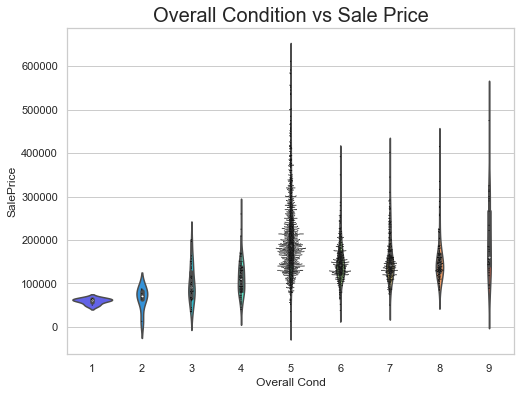

In [212]:
plt.figure(figsize=(8,6))
plt.title('Overall Condition vs Sale Price', fontsize=20)
sns.violinplot(x='Overall Cond', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Overall Cond', y='SalePrice', data=df_train, color='black', size=1)

## Comment:

1. The above violin plot doesn't the house overall condition contributes linearly to the house sales price
2. The rate of 5 (condition is average) has the highest Sales price. 

Comparing the House Quality vs House Condition, it's very clearly to say House Quality is much more important predictor, while House Condition may be not an interesting feature.  

## 5.8 Garage

2 Garage Features have been identified with strong correlation to the sales price, let's plot them out and get a closer look at the data visualization: 
- Garage Area, 0.655097
- Garage Cars, 0.648227

### 5.8.1 Garage Cars

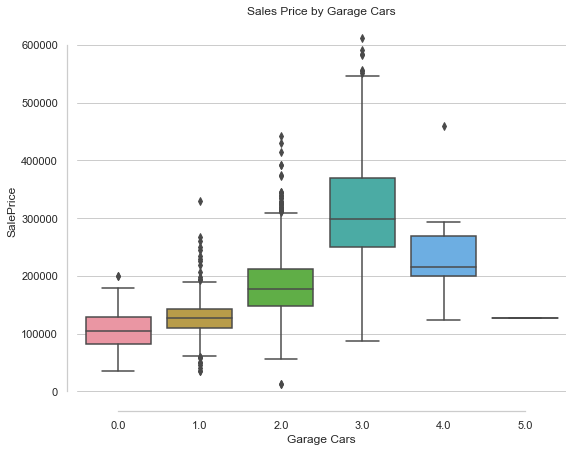

In [213]:
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
plot1 = sns.boxplot(data=df_train, x='Garage Cars', y='SalePrice')
ax.set_title("Sales Price by Garage Cars")
sns.despine(offset=10, trim=True)
#plt.xticks(rotation=90)
plt.show()

In [215]:
df_train.groupby('Garage Cars').agg({'SalePrice':['mean','min','max']})

SalePrice                
                      mean     min     max
Garage Cars                               
0.0          106065.991228   34900  200500
1.0          126824.591603   35000  330000
2.0          184147.213216   12789  441929
3.0          309861.877863   87000  611657
4.0          229653.846154  123000  460000
5.0          126500.000000  126500  126500

## Comment:

From above boxplot, We can see Garage that can contain 3 cars has the highest sale price at 611+k. 

### 5.8.2 Garage Area

Text(0.5, 1.0, 'Sales Price by Garage Area')

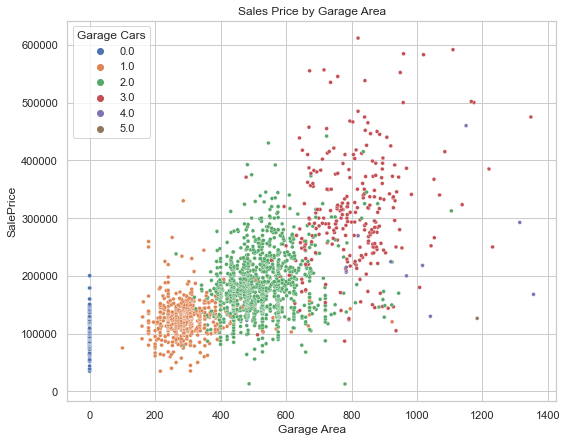

In [216]:
sns.scatterplot(x="Garage Area", y="SalePrice", hue="Garage Cars", s=15, data=df_train, palette="deep")
plt.title("Sales Price by Garage Area")

## Comment:

1. Garage Area with a coefficient of 0.655097 to Sale Price, also it shows the same linear correlation in above scatterplot. The bigger the Garage Area, the higher price the house would be sold. 

2. Majority houses with the Garage for 1-3 cars, houses with 3 cars' Garage have the highest Sales price